# Weeaboo Subsite Overview

## Preliminary Preparations

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib_venn
from pywaffle import Waffle
import seaborn as sns

import math

import json
import yaml
import ast

import requests
from PIL import Image
from io import BytesIO
import IPython.display as Disp

from re import findall, match, sub
import itertools

from datetime import datetime
from datetime import tzinfo

%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 10]

%config Completer.use_jedi = False

print("Imports Done!")

Imports Done!


In [2]:
PATH = "/home/aleksey/PycharmProjects/DTF_database_and_scrapper_config/"

In [3]:
weeaboo_origin = pd.read_csv(PATH + 'weaboo_data_25_04.csv', index_col=0)
weeaboo_origin.reset_index(inplace=True)
weeaboo_origin.drop(columns=['index'], inplace=True)
weeaboo_origin.head()

,id,url,author,badges,commentsCount,commentsSeenCount,favoritesCount,cover,date,dateRFC,...,is_show_thanks,is_still_updating,is_filled_by_editors,isEditorial,audioUrl,hotness,commentEditor,summarize,repost,stackedRepostsAuthors
0,713221,https://dtf.ru/s/weaboo/713221-slice-of-japan-2,"{'id': 308491, 'url': 'https://dtf.ru/u/308491...","[{'type': 'top', 'text': 'Виабу', 'background'...",0,NaN,0,"{'additionalData': {'size': 409704, 'type': 'j...",1619351657,"Sun, 25 Apr 2021 14:54:17 +0300",...,False,False,False,False,NaN,0,{'enabled': True},Красивого неба вам в ленту *-* #sliceofJapan,NaN,NaN
1,713925,https://dtf.ru/s/weaboo/713925-merzkie-lica,"{'id': 201672, 'url': 'https://dtf.ru/u/201672...","[{'type': 'top', 'text': 'Виабу', 'background'...",2,NaN,3,"{'additionalData': {'size': 6196596, 'type': '...",1619350766,"Sun, 25 Apr 2021 14:39:26 +0300",...,False,False,False,False,NaN,0,{'enabled': True},NaN,NaN,NaN
2,713929,https://dtf.ru/s/weaboo/713929-idealno,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...","[{'type': 'top', 'text': 'Виабу', 'background'...",0,NaN,1,"{'additionalData': {'size': 185503, 'type': 'j...",1619350722,"Sun, 25 Apr 2021 14:38:42 +0300",...,False,False,False,False,NaN,0,{'enabled': True},NaN,NaN,NaN
3,713922,https://dtf.ru/s/weaboo/713922,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...","[{'type': 'top', 'text': 'Виабу', 'background'...",5,NaN,3,"{'additionalData': {'size': 630119, 'type': 'p...",1619350298,"Sun, 25 Apr 2021 14:31:38 +0300",...,False,False,False,False,NaN,0,{'enabled': True},NaN,NaN,NaN
4,713905,https://dtf.ru/u/91972-maks-arr/713905-sluchay...,"{'id': 91972, 'url': 'https://dtf.ru/u/91972-m...","[{'type': 'top', 'text': 'Maks-arr', 'backgrou...",0,NaN,3,"{'additionalData': {'size': 284676, 'type': 'j...",1619349481,"Sun, 25 Apr 2021 14:18:01 +0300",...,False,False,False,False,NaN,0,{'enabled': True},Первые пять работ попавшихся в ленте. Случайны...,"{'author': {'id': 261696, 'url': 'https://dtf....",[]


In [4]:
weeaboo_origin.tail(3)

,id,url,author,badges,commentsCount,commentsSeenCount,favoritesCount,cover,date,dateRFC,...,is_show_thanks,is_still_updating,is_filled_by_editors,isEditorial,audioUrl,hotness,commentEditor,summarize,repost,stackedRepostsAuthors
7675,170958,https://dtf.ru/s/weaboo/170958,"{'id': 197370, 'url': 'https://dtf.ru/u/197370...","[{'type': 'top', 'text': 'Виабу', 'background'...",8,NaN,1,"{'additionalData': {'size': 2761663, 'type': '...",1594749437,"Tue, 14 Jul 2020 20:57:17 +0300",...,False,False,False,False,NaN,0,{'enabled': True},"Говоров красава, спасибо за анимемы на дтф",NaN,NaN
7676,170948,https://dtf.ru/s/weaboo/170948,"{'id': 92674, 'url': 'https://dtf.ru/u/92674-a...","[{'type': 'top', 'text': 'Виабу', 'background'...",6,NaN,1,"{'additionalData': {'size': 5588717, 'type': '...",1594748952,"Tue, 14 Jul 2020 20:49:12 +0300",...,False,False,False,False,NaN,0,{'enabled': True},Иначе я в Драме запосщу как они до меня домога...,NaN,NaN
7677,170920,https://dtf.ru/s/weaboo/170920-nu-che-pacany-a...,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...","[{'type': 'top', 'text': 'Виабу', 'background'...",42,NaN,4,"{'additionalData': {'size': 287640, 'type': 'j...",1594746603,"Tue, 14 Jul 2020 20:10:03 +0300",...,False,False,False,False,NaN,0,{'enabled': True},"Еще один мертвый подсайт, но зато с аниме Вмес...",NaN,NaN


In [5]:
weeaboo_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7678 entries, 0 to 7677
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7678 non-null   int64  
 1   url                     7678 non-null   object 
 2   author                  7678 non-null   object 
 3   badges                  7678 non-null   object 
 4   commentsCount           7678 non-null   int64  
 5   commentsSeenCount       0 non-null      float64
 6   favoritesCount          7678 non-null   int64  
 7   cover                   7339 non-null   object 
 8   date                    7678 non-null   int64  
 9   dateRFC                 7678 non-null   object 
 10  date_favorite           0 non-null      float64
 11  last_modification_date  7678 non-null   int64  
 12  hitsCount               7678 non-null   int64  
 13  intro                   4398 non-null   object 
 14  introInFeed             0 non-null      

**Потенциально полезно:**
- id -- ИД статьи в базе, инкрементный идентификатор
- url -- ссылка на статью
- author -- автор: словарь с данными, нужна обработка
- commentsCount -- кол-во комментов
- favoritesCount -- кол-во добавлений в закладки
- cover -- это КПДВ (нужно ли?)
- date -- unix timestamp
- dateRFC -- человекочитаемое время, UTC+3
- hitsCount -- просмотры
- isRepost -- бинарный маркер репоста
- likes -- лайки: словарь, нужна обработка
- subsite -- подсайт, в котором опубликован оригинал статьи
- title -- заголовок
- type -- тип статьи 
- entryContent -- содержимое поста
- repost -- подсайт из которого сделан репост: словарь, нужна обработка
- stackedRepostsAuthors -- репостнувшие пользователи/подсайты - список
- blocks -- содержимое поста поблочно. 
- summarize -- последний абзац/резюмирующий абзац - видимо, некая фича редактора

## Data Preprocessing

In [6]:
date_parser = lambda x: datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')

In [7]:
df = pd.read_csv(PATH + "weaboo_data_25_04.csv", parse_dates=['date'], date_parser=date_parser, 
                 index_col=None, # None / 0 / ['date']
                 usecols=['id', 'url', 'author', 'commentsCount', 'favoritesCount', 'date', 
                          'hitsCount', 'isRepost', 'likes', 'subsite', 'title', 'type', 
                          'repost', 'stackedRepostsAuthors', 'blocks'])
df.head()

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,title,type,blocks,repost,stackedRepostsAuthors
0,713221,https://dtf.ru/s/weaboo/713221-slice-of-japan-2,"{'id': 308491, 'url': 'https://dtf.ru/u/308491...",0,0,2021-04-25 14:54:17,4,False,"{'is_liked': 0, 'count': 2, 'summ': 2, 'is_hid...","{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",Slice of Japan №2,1,"[{'type': 'text', 'data': {'text': 'Красивого ...",NaN,NaN
1,713925,https://dtf.ru/s/weaboo/713925-merzkie-lica,"{'id': 201672, 'url': 'https://dtf.ru/u/201672...",2,3,2021-04-25 14:39:26,81,False,"{'is_liked': 0, 'count': 4, 'summ': 4, 'is_hid...","{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",Мерзкие лица,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN
2,713929,https://dtf.ru/s/weaboo/713929-idealno,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...",0,1,2021-04-25 14:38:42,22,False,"{'is_liked': 0, 'count': 15, 'summ': 15, 'is_h...","{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",Идеально,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN
3,713922,https://dtf.ru/s/weaboo/713922,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...",5,3,2021-04-25 14:31:38,71,False,"{'is_liked': 0, 'count': 9, 'summ': 9, 'is_hid...","{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN
4,713905,https://dtf.ru/u/91972-maks-arr/713905-sluchay...,"{'id': 91972, 'url': 'https://dtf.ru/u/91972-m...",0,3,2021-04-25 14:18:01,36,True,"{'is_liked': 0, 'count': 8, 'summ': 8, 'is_hid...","{'id': 91972, 'url': 'https://dtf.ru/u/91972-m...",Случайное из Твиттера 210425,1,"[{'type': 'text', 'data': {'text': 'Первые пят...","{'author': {'id': 261696, 'url': 'https://dtf....",[]


In [8]:
df.shape

(7678, 15)

Нужно:
- id
- url
- author -- автор: словарь с данными, нужна обработка
- commentsCount -- кол-во комментов
- favoritesCount -- кол-во добавлений в закладки
- date -- unix timestamp
- dateRFC -- человекочитаемое время, UTC+3
- hitsCount -- просмотры
- isRepost -- бинарный маркер репоста
- likes -- лайки, словарь, нужна обработка
- subsite -- подсайт, в котором опубликован оригинал статьи
- title -- заголовок
- type -- тип статьи 
- repost -- подсайт из которого сделан репост, словарь, нужна обработка
- stackedRepostsAuthors -- репостнувшие пользователи/подсайты - список
- blocks -- содержимое поста поблочно. 

Извлечём виды контента, содержащиеся в посте.

In [9]:
def get_medias(media):
    """
        Extracting mediacontent types from pd.Series
    """
    medias = []
    for x in media:
        medias.append(x['type'])
    return(set(medias))    

Преобразуем лайки, автора и подсайт в удобочитаемый формат.

In [10]:
df['likes'] = df['likes'].apply(lambda x: ast.literal_eval(x))
df['likes'] = df['likes'].apply(lambda x: x.get('summ'))

medias = df.loc[:, 'blocks']
medias_resume_list = medias.apply(lambda x: ast.literal_eval(x))
df['media_content_types'] = medias_resume_list.apply(lambda el: get_medias(el))

df['author'] = df['author'].apply(lambda x: ast.literal_eval(x))
df['author_name'] = df['author'].apply(lambda x: x.get('name'))
df['author_type'] = df['author'].apply(lambda x: x.get('type'))
df['author_avatar_url'] = df['author'].apply(lambda x: x.get('avatar_url'))

df['subsite'] = df['subsite'].apply(lambda x: ast.literal_eval(x))
df['subsite'] = df['subsite'].apply(lambda x: x.get('name'))

In [11]:
df.head()

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,title,type,blocks,repost,stackedRepostsAuthors,media_content_types,author_name,author_type,author_avatar_url
0,713221,https://dtf.ru/s/weaboo/713221-slice-of-japan-2,"{'id': 308491, 'url': 'https://dtf.ru/u/308491...",0,0,2021-04-25 14:54:17,4,False,2,Виабу,Slice of Japan №2,1,"[{'type': 'text', 'data': {'text': 'Красивого ...",NaN,NaN,"{media, text}",Yumi-san,1,https://leonardo.osnova.io/87211c2e-9c09-5a53-...
1,713925,https://dtf.ru/s/weaboo/713925-merzkie-lica,"{'id': 201672, 'url': 'https://dtf.ru/u/201672...",2,3,2021-04-25 14:39:26,81,False,4,Виабу,Мерзкие лица,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,{media},Cold Tea,1,https://leonardo.osnova.io/e8d7c3ed-dfb9-599a-...
2,713929,https://dtf.ru/s/weaboo/713929-idealno,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...",0,1,2021-04-25 14:38:42,22,False,15,Виабу,Идеально,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,{media},Over9k5000,1,https://leonardo.osnova.io/5dded09e-5816-5b52-...
3,713922,https://dtf.ru/s/weaboo/713922,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...",5,3,2021-04-25 14:31:38,71,False,9,Виабу,NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,{media},олег уходи,1,https://leonardo.osnova.io/b6f745b6-3963-56d5-...
4,713905,https://dtf.ru/u/91972-maks-arr/713905-sluchay...,"{'id': 91972, 'url': 'https://dtf.ru/u/91972-m...",0,3,2021-04-25 14:18:01,36,True,8,Maks-arr,Случайное из Твиттера 210425,1,"[{'type': 'text', 'data': {'text': 'Первые пят...","{'author': {'id': 261696, 'url': 'https://dtf....",[],"{media, text, audio}",Maks-arr,1,https://leonardo.osnova.io/e677f394-d849-c602-...


---
### Проведём тесты на небольшом кусочке датасета
---

In [12]:
df_subs = df.loc[0:5, :]
df_subs

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,title,type,blocks,repost,stackedRepostsAuthors,media_content_types,author_name,author_type,author_avatar_url
0,713221,https://dtf.ru/s/weaboo/713221-slice-of-japan-2,"{'id': 308491, 'url': 'https://dtf.ru/u/308491...",0,0,2021-04-25 14:54:17,4,False,2,Виабу,Slice of Japan №2,1,"[{'type': 'text', 'data': {'text': 'Красивого ...",NaN,NaN,"{media, text}",Yumi-san,1,https://leonardo.osnova.io/87211c2e-9c09-5a53-...
1,713925,https://dtf.ru/s/weaboo/713925-merzkie-lica,"{'id': 201672, 'url': 'https://dtf.ru/u/201672...",2,3,2021-04-25 14:39:26,81,False,4,Виабу,Мерзкие лица,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,{media},Cold Tea,1,https://leonardo.osnova.io/e8d7c3ed-dfb9-599a-...
2,713929,https://dtf.ru/s/weaboo/713929-idealno,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...",0,1,2021-04-25 14:38:42,22,False,15,Виабу,Идеально,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,{media},Over9k5000,1,https://leonardo.osnova.io/5dded09e-5816-5b52-...
3,713922,https://dtf.ru/s/weaboo/713922,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...",5,3,2021-04-25 14:31:38,71,False,9,Виабу,NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,{media},олег уходи,1,https://leonardo.osnova.io/b6f745b6-3963-56d5-...
4,713905,https://dtf.ru/u/91972-maks-arr/713905-sluchay...,"{'id': 91972, 'url': 'https://dtf.ru/u/91972-m...",0,3,2021-04-25 14:18:01,36,True,8,Maks-arr,Случайное из Твиттера 210425,1,"[{'type': 'text', 'data': {'text': 'Первые пят...","{'author': {'id': 261696, 'url': 'https://dtf....",[],"{media, text, audio}",Maks-arr,1,https://leonardo.osnova.io/e677f394-d849-c602-...
5,713612,https://dtf.ru/s/weaboo/713612-astolfo-luchsha...,"{'id': 186664, 'url': 'https://dtf.ru/u/186664...",15,3,2021-04-25 12:28:40,207,False,18,Виабу,"Астольфо - лучшая ""девочка""",1,"[{'type': 'text', 'data': {'text': 'В посте ещ...",NaN,NaN,"{media, text}",Петя Миров,1,https://leonardo.osnova.io/7626703b-af5a-59da-...


In [13]:
df_subs['media_content_types']

0           {media, text}
1                 {media}
2                 {media}
3                 {media}
4    {media, text, audio}
5           {media, text}
Name: media_content_types, dtype: object

Создаём множество с самыми распространёнными типами контента в статьях. Остальное будем отлавливать специально.

In [14]:
etalon_set = {"media", "delimiter", "link", "header", "text", "video", "list", "telegram", "quote"}

In [15]:
df_subs.loc[:, 'exotic_media_type'] = df_subs.apply(lambda row: row.media_content_types - etalon_set, axis=1)
df_subs.loc[:, 'exotic_media_type'] = df_subs['exotic_media_type'].apply(lambda row: row if len(row) != 0 else 0)

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


https://stackoverflow.com/questions/58528989/pandas-get-unique-values-from-column-of-lists

https://datascience.stackexchange.com/questions/17769/how-to-fill-missing-value-based-on-other-columns-in-pandas-dataframe

https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/


In [16]:
df_subs['exotic_media_type'].explode().unique() 

array([0, 'audio'], dtype=object)

In [17]:
df_subs

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,title,type,blocks,repost,stackedRepostsAuthors,media_content_types,author_name,author_type,author_avatar_url,exotic_media_type
0,713221,https://dtf.ru/s/weaboo/713221-slice-of-japan-2,"{'id': 308491, 'url': 'https://dtf.ru/u/308491...",0,0,2021-04-25 14:54:17,4,False,2,Виабу,Slice of Japan №2,1,"[{'type': 'text', 'data': {'text': 'Красивого ...",NaN,NaN,"{media, text}",Yumi-san,1,https://leonardo.osnova.io/87211c2e-9c09-5a53-...,0
1,713925,https://dtf.ru/s/weaboo/713925-merzkie-lica,"{'id': 201672, 'url': 'https://dtf.ru/u/201672...",2,3,2021-04-25 14:39:26,81,False,4,Виабу,Мерзкие лица,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,{media},Cold Tea,1,https://leonardo.osnova.io/e8d7c3ed-dfb9-599a-...,0
2,713929,https://dtf.ru/s/weaboo/713929-idealno,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...",0,1,2021-04-25 14:38:42,22,False,15,Виабу,Идеально,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,{media},Over9k5000,1,https://leonardo.osnova.io/5dded09e-5816-5b52-...,0
3,713922,https://dtf.ru/s/weaboo/713922,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...",5,3,2021-04-25 14:31:38,71,False,9,Виабу,NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,{media},олег уходи,1,https://leonardo.osnova.io/b6f745b6-3963-56d5-...,0
4,713905,https://dtf.ru/u/91972-maks-arr/713905-sluchay...,"{'id': 91972, 'url': 'https://dtf.ru/u/91972-m...",0,3,2021-04-25 14:18:01,36,True,8,Maks-arr,Случайное из Твиттера 210425,1,"[{'type': 'text', 'data': {'text': 'Первые пят...","{'author': {'id': 261696, 'url': 'https://dtf....",[],"{media, text, audio}",Maks-arr,1,https://leonardo.osnova.io/e677f394-d849-c602-...,{audio}
5,713612,https://dtf.ru/s/weaboo/713612-astolfo-luchsha...,"{'id': 186664, 'url': 'https://dtf.ru/u/186664...",15,3,2021-04-25 12:28:40,207,False,18,Виабу,"Астольфо - лучшая ""девочка""",1,"[{'type': 'text', 'data': {'text': 'В посте ещ...",NaN,NaN,"{media, text}",Петя Миров,1,https://leonardo.osnova.io/7626703b-af5a-59da-...,0


Произведём расчёт количества символов, слов, хэш-тэгов, а также медиаконтента, содержащегося в статьях.

Ссылки на твиттер, телеграм и прочие источники учитываются как один тип.

Также виджет инстаграма учитывается как одно изображение, вне зависимости от количества изображений в галерее. Это вызвано тем, что API Очобы не отдаёт информацию о типе содержимого виджета.

https://stackoverflow.com/questions/48632356/python-extract-hashtags-out-of-a-text-file
    
https://stackoverflow.com/questions/2527892/parsing-a-tweet-to-extract-hashtags-into-an-array


Нужно попробовать вот этот паттерн: [#][^\s#]+

Нужно попробовать вот этот паттерн: [#][^\s#|\]|\)]+

In [18]:
def stats_counter(df: pd.DataFrame):
    
    # Гифки считаются изображениями-картинками
    
    symbols_by_block = []
    words_by_block = []
    
    image_counter = 0
    video_counter = 0
    audio_counter = 0
    
    links_counter = 0
    
    hashtags = []
      
    content_in_str = df['blocks']
    resume_list = ast.literal_eval(content_in_str) 
    
    for element in resume_list:
        if element['type'] in ['text', 'quote', 'header', 'incut', 'warning']:
            symbols_by_block.append(len(element['data']['text']))
            words_by_block.append(len(element['data']['text'].split()))
            hashtags.append(findall(r'[#][^\s#|\]|\)]+', element['data']['text']))
            
        if element['type'] == 'number': 
            symbols_by_block.append(len(element['data']['title']))
            words_by_block.append(len(element['data']['title'].split()))

        if element['type'] == 'list': 
            for elem in element['data']['items']:
                symbols_by_block.append(len(elem))
                words_by_block.append(len(elem.split()))
                hashtags.append(findall(r'[#][^\s#|\]|\)]+', elem))

        if element['type'] == 'video':
            video_counter += 1

        if element['type'] == 'media': 
            for elem in element['data']['items']:
                image_counter += 1
                symbols_by_block.append(len(elem['title']))
                words_by_block.append(len(elem['title'].split())) 
                
        if element['type'] == 'instagram': 
            image_counter += 1
            
        if element['type'] in ['audio', 'spotify']:
            audio_counter += 1

        if element['type'] in ['tweet', 'link', 'telegram', 'person']: 
            links_counter += 1
    
    hashtags = [x for x in hashtags if x != []]
    hashtags = list(itertools.chain(*hashtags))    
    
    return(sum(symbols_by_block), sum(words_by_block), image_counter, video_counter, 
           links_counter, audio_counter, sum([image_counter, video_counter, 
           links_counter, audio_counter]), hashtags)

In [19]:
df_subs.apply(lambda row: stats_counter(row), axis=1)

0           (46, 7, 4, 0, 0, 0, 4, [#sliceofJapan])
1                         (0, 0, 5, 0, 0, 0, 5, [])
2                         (0, 0, 1, 0, 0, 0, 1, [])
3                         (0, 0, 1, 0, 0, 0, 1, [])
4    (178, 13, 5, 0, 0, 1, 6, [#art, #арт, #anime])
5           (34, 6, 4, 0, 0, 0, 4, [#anime, #meme])
dtype: object

https://stackoverflow.com/questions/23586510/return-multiple-columns-from-pandas-apply

https://stackoverflow.com/questions/47969756/pandas-apply-function-that-returns-two-new-columns

https://stackoverflow.com/questions/16236684/apply-pandas-function-to-column-to-create-multiple-new-columns

In [20]:
df_subs[['symbols', 'words', 'images', 'videos', 'links', 'audio', 'total_mediacontent', 'hashtags']] = \
df_subs.apply(lambda row: stats_counter(row), axis=1, result_type='expand')

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
df_subs.loc[2, :]

id                                                                  713929
url                                 https://dtf.ru/s/weaboo/713929-idealno
author                   {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...
commentsCount                                                            0
favoritesCount                                                           1
date                                                   2021-04-25 14:38:42
hitsCount                                                               22
isRepost                                                             False
likes                                                                   15
subsite                                                              Виабу
title                                                             Идеально
type                                                                     1
blocks                   [{'type': 'media', 'data': {'items': [{'title'...
repost                   

In [22]:
df_subs

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,...,author_avatar_url,exotic_media_type,symbols,words,images,videos,links,audio,total_mediacontent,hashtags
0,713221,https://dtf.ru/s/weaboo/713221-slice-of-japan-2,"{'id': 308491, 'url': 'https://dtf.ru/u/308491...",0,0,2021-04-25 14:54:17,4,False,2,Виабу,...,https://leonardo.osnova.io/87211c2e-9c09-5a53-...,0,46,7,4,0,0,0,4,[#sliceofJapan]
1,713925,https://dtf.ru/s/weaboo/713925-merzkie-lica,"{'id': 201672, 'url': 'https://dtf.ru/u/201672...",2,3,2021-04-25 14:39:26,81,False,4,Виабу,...,https://leonardo.osnova.io/e8d7c3ed-dfb9-599a-...,0,0,0,5,0,0,0,5,[]
2,713929,https://dtf.ru/s/weaboo/713929-idealno,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...",0,1,2021-04-25 14:38:42,22,False,15,Виабу,...,https://leonardo.osnova.io/5dded09e-5816-5b52-...,0,0,0,1,0,0,0,1,[]
3,713922,https://dtf.ru/s/weaboo/713922,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...",5,3,2021-04-25 14:31:38,71,False,9,Виабу,...,https://leonardo.osnova.io/b6f745b6-3963-56d5-...,0,0,0,1,0,0,0,1,[]
4,713905,https://dtf.ru/u/91972-maks-arr/713905-sluchay...,"{'id': 91972, 'url': 'https://dtf.ru/u/91972-m...",0,3,2021-04-25 14:18:01,36,True,8,Maks-arr,...,https://leonardo.osnova.io/e677f394-d849-c602-...,{audio},178,13,5,0,0,1,6,"[#art, #арт, #anime]"
5,713612,https://dtf.ru/s/weaboo/713612-astolfo-luchsha...,"{'id': 186664, 'url': 'https://dtf.ru/u/186664...",15,3,2021-04-25 12:28:40,207,False,18,Виабу,...,https://leonardo.osnova.io/7626703b-af5a-59da-...,0,34,6,4,0,0,0,4,"[#anime, #meme]"


---
### Возвращаемся к исходному датасету и применяем разработанные функции
---

In [23]:
df.apply(lambda row: stats_counter(row), axis=1)

0              (46, 7, 4, 0, 0, 0, 4, [#sliceofJapan])
1                            (0, 0, 5, 0, 0, 0, 5, [])
2                            (0, 0, 1, 0, 0, 0, 1, [])
3                            (0, 0, 1, 0, 0, 0, 1, [])
4       (178, 13, 5, 0, 0, 1, 6, [#art, #арт, #anime])
                             ...                      
7673                         (0, 0, 1, 0, 0, 0, 1, [])
7674                         (0, 0, 0, 1, 0, 0, 1, [])
7675                        (42, 7, 1, 0, 0, 0, 1, [])
7676                      (181, 26, 1, 0, 0, 0, 1, [])
7677                      (118, 22, 1, 0, 0, 0, 1, [])
Length: 7678, dtype: object

In [24]:
df[['symbols', 'words', 'images', 'videos', 'links', 'audio', 'total_mediacontent', 'hashtags']] = \
df.apply(lambda row: stats_counter(row), axis=1, result_type='expand')

In [25]:
df.head()

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,...,author_type,author_avatar_url,symbols,words,images,videos,links,audio,total_mediacontent,hashtags
0,713221,https://dtf.ru/s/weaboo/713221-slice-of-japan-2,"{'id': 308491, 'url': 'https://dtf.ru/u/308491...",0,0,2021-04-25 14:54:17,4,False,2,Виабу,...,1,https://leonardo.osnova.io/87211c2e-9c09-5a53-...,46,7,4,0,0,0,4,[#sliceofJapan]
1,713925,https://dtf.ru/s/weaboo/713925-merzkie-lica,"{'id': 201672, 'url': 'https://dtf.ru/u/201672...",2,3,2021-04-25 14:39:26,81,False,4,Виабу,...,1,https://leonardo.osnova.io/e8d7c3ed-dfb9-599a-...,0,0,5,0,0,0,5,[]
2,713929,https://dtf.ru/s/weaboo/713929-idealno,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...",0,1,2021-04-25 14:38:42,22,False,15,Виабу,...,1,https://leonardo.osnova.io/5dded09e-5816-5b52-...,0,0,1,0,0,0,1,[]
3,713922,https://dtf.ru/s/weaboo/713922,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...",5,3,2021-04-25 14:31:38,71,False,9,Виабу,...,1,https://leonardo.osnova.io/b6f745b6-3963-56d5-...,0,0,1,0,0,0,1,[]
4,713905,https://dtf.ru/u/91972-maks-arr/713905-sluchay...,"{'id': 91972, 'url': 'https://dtf.ru/u/91972-m...",0,3,2021-04-25 14:18:01,36,True,8,Maks-arr,...,1,https://leonardo.osnova.io/e677f394-d849-c602-...,178,13,5,0,0,1,6,"[#art, #арт, #anime]"


In [26]:
df.tail()

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,...,author_type,author_avatar_url,symbols,words,images,videos,links,audio,total_mediacontent,hashtags
7673,171001,https://dtf.ru/s/weaboo/171001-satdog,"{'id': 127404, 'url': 'https://dtf.ru/u/127404...",1,1,2020-07-14 21:43:51,130,False,20,Виабу,...,1,https://leonardo.osnova.io/86bd043a-b668-5935-...,0,0,1,0,0,0,1,[]
7674,170996,https://dtf.ru/s/weaboo/170996-milota,"{'id': 162369, 'url': 'https://dtf.ru/u/162369...",6,1,2020-07-14 21:34:11,107,False,18,Виабу,...,1,https://leonardo.osnova.io/3e226ee5-54e0-58e6-...,0,0,0,1,0,0,1,[]
7675,170958,https://dtf.ru/s/weaboo/170958,"{'id': 197370, 'url': 'https://dtf.ru/u/197370...",8,1,2020-07-14 20:57:17,117,False,19,Виабу,...,1,https://leonardo.osnova.io/dc4f5913-3646-5404-...,42,7,1,0,0,0,1,[]
7676,170948,https://dtf.ru/s/weaboo/170948,"{'id': 92674, 'url': 'https://dtf.ru/u/92674-a...",6,1,2020-07-14 20:49:12,160,False,24,Виабу,...,1,https://leonardo.osnova.io/c6fbeb6b-56c0-586d-...,181,26,1,0,0,0,1,[]
7677,170920,https://dtf.ru/s/weaboo/170920-nu-che-pacany-a...,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...",42,4,2020-07-14 20:10:03,1406,False,64,Виабу,...,1,https://leonardo.osnova.io/b6f745b6-3963-56d5-...,118,22,1,0,0,0,1,[]


In [27]:
etalon_set = {"media", "delimiter", "link", "header", "text", "video", "list", "telegram", "quote", 
              "tweet", "audio", "incut", "number", "instagram", "quiz", "warning", "spotify", "person"}

In [28]:
df.loc[:, 'exotic_media_type'] = df.apply(lambda row: row.media_content_types - etalon_set, axis=1)
df.loc[:, 'exotic_media_type'] = df['exotic_media_type'].apply(lambda row: row if len(row) != 0 else 0)

In [29]:
df['exotic_media_type'].explode().unique() 

array([0])

In [30]:
df[df['exotic_media_type'] != 0]

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,...,author_avatar_url,symbols,words,images,videos,links,audio,total_mediacontent,hashtags,exotic_media_type


In [31]:
df.drop(columns=['exotic_media_type'], inplace=True)

### Спустя 5 итераций наконец-то учтён контент всех типов. 
### Актуально на 14.03.2021. 

При выгрузке нового датасета стоит проверять появление новых видов контента.

### Перевод camel-style в snake-style названий столбцов датафрейма

https://stackoverflow.com/questions/1175208/elegant-python-function-to-convert-camelcase-to-snake-case

In [32]:
df.columns

Index(['id', 'url', 'author', 'commentsCount', 'favoritesCount', 'date',
       'hitsCount', 'isRepost', 'likes', 'subsite', 'title', 'type', 'blocks',
       'repost', 'stackedRepostsAuthors', 'media_content_types', 'author_name',
       'author_type', 'author_avatar_url', 'symbols', 'words', 'images',
       'videos', 'links', 'audio', 'total_mediacontent', 'hashtags'],
      dtype='object')

In [33]:
def camel_to_snake(name):
#     re.sub used
    name = sub('(.)([A-Z][a-z]+)', r'\1_\2', name) 
    return sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()

In [34]:
df.columns = df.columns.to_series().apply(camel_to_snake)
df.columns

Index(['id', 'url', 'author', 'comments_count', 'favorites_count', 'date',
       'hits_count', 'is_repost', 'likes', 'subsite', 'title', 'type',
       'blocks', 'repost', 'stacked_reposts_authors', 'media_content_types',
       'author_name', 'author_type', 'author_avatar_url', 'symbols', 'words',
       'images', 'videos', 'links', 'audio', 'total_mediacontent', 'hashtags'],
      dtype='object')

In [35]:
df.head()

,id,url,author,comments_count,favorites_count,date,hits_count,is_repost,likes,subsite,...,author_type,author_avatar_url,symbols,words,images,videos,links,audio,total_mediacontent,hashtags
0,713221,https://dtf.ru/s/weaboo/713221-slice-of-japan-2,"{'id': 308491, 'url': 'https://dtf.ru/u/308491...",0,0,2021-04-25 14:54:17,4,False,2,Виабу,...,1,https://leonardo.osnova.io/87211c2e-9c09-5a53-...,46,7,4,0,0,0,4,[#sliceofJapan]
1,713925,https://dtf.ru/s/weaboo/713925-merzkie-lica,"{'id': 201672, 'url': 'https://dtf.ru/u/201672...",2,3,2021-04-25 14:39:26,81,False,4,Виабу,...,1,https://leonardo.osnova.io/e8d7c3ed-dfb9-599a-...,0,0,5,0,0,0,5,[]
2,713929,https://dtf.ru/s/weaboo/713929-idealno,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...",0,1,2021-04-25 14:38:42,22,False,15,Виабу,...,1,https://leonardo.osnova.io/5dded09e-5816-5b52-...,0,0,1,0,0,0,1,[]
3,713922,https://dtf.ru/s/weaboo/713922,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...",5,3,2021-04-25 14:31:38,71,False,9,Виабу,...,1,https://leonardo.osnova.io/b6f745b6-3963-56d5-...,0,0,1,0,0,0,1,[]
4,713905,https://dtf.ru/u/91972-maks-arr/713905-sluchay...,"{'id': 91972, 'url': 'https://dtf.ru/u/91972-m...",0,3,2021-04-25 14:18:01,36,True,8,Maks-arr,...,1,https://leonardo.osnova.io/e677f394-d849-c602-...,178,13,5,0,0,1,6,"[#art, #арт, #anime]"


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7678 entries, 0 to 7677
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       7678 non-null   int64         
 1   url                      7678 non-null   object        
 2   author                   7678 non-null   object        
 3   comments_count           7678 non-null   int64         
 4   favorites_count          7678 non-null   int64         
 5   date                     7678 non-null   datetime64[ns]
 6   hits_count               7678 non-null   int64         
 7   is_repost                7678 non-null   bool          
 8   likes                    7678 non-null   int64         
 9   subsite                  7678 non-null   object        
 10  title                    4129 non-null   object        
 11  type                     7678 non-null   int64         
 12  blocks                   7678 non-

### Удалённые статьи

In [37]:
df[df.title == 'Статья удалена']

,id,url,author,comments_count,favorites_count,date,hits_count,is_repost,likes,subsite,...,author_type,author_avatar_url,symbols,words,images,videos,links,audio,total_mediacontent,hashtags
579,692199,https://dtf.ru/s/weaboo/692199-statya-udalena,"{'id': 338383, 'url': 'https://dtf.ru/u/338383...",0,2,2021-04-03 20:32:55,117,False,8,Виабу,...,1,https://leonardo.osnova.io/609ea8f8-19e4-032d-...,43,7,0,0,0,0,0,[]
605,691050,https://dtf.ru/s/weaboo/691050-statya-udalena,"{'id': 338383, 'url': 'https://dtf.ru/u/338383...",1,4,2021-04-02 16:10:11,105,False,14,Виабу,...,1,https://leonardo.osnova.io/609ea8f8-19e4-032d-...,43,7,0,0,0,0,0,[]
799,682788,https://dtf.ru/s/weaboo/682788-statya-udalena,"{'id': 338383, 'url': 'https://dtf.ru/u/338383...",22,3,2021-03-25 16:50:32,183,False,11,Виабу,...,1,https://leonardo.osnova.io/609ea8f8-19e4-032d-...,43,7,0,0,0,0,0,[]
887,679200,https://dtf.ru/s/weaboo/679200-statya-udalena,"{'id': 338383, 'url': 'https://dtf.ru/u/338383...",123,27,2021-03-22 16:39:20,1483,False,23,Виабу,...,1,https://leonardo.osnova.io/609ea8f8-19e4-032d-...,43,7,0,0,0,0,0,[]
936,677696,https://dtf.ru/s/weaboo/677696-statya-udalena,"{'id': 338383, 'url': 'https://dtf.ru/u/338383...",7,4,2021-03-20 18:16:17,168,False,17,Виабу,...,1,https://leonardo.osnova.io/609ea8f8-19e4-032d-...,43,7,0,0,0,0,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7566,169416,https://dtf.ru/u/240402-informacionnyy-orzemes...,"{'id': 240402, 'url': 'https://dtf.ru/u/240402...",20,6,2020-07-12 15:54:15,189,True,14,Информационный Орзэмэс,...,1,https://leonardo.osnova.io/b72c9bb3-5240-82b3-...,43,7,0,0,0,0,0,[]
7578,172192,https://dtf.ru/s/weaboo/172192-statya-udalena,"{'id': 70637, 'url': 'https://dtf.ru/u/70637-e...",3,1,2020-07-16 17:40:08,86,False,14,Виабу,...,1,https://leonardo.osnova.io/bcefb3c4-ae76-3f64-...,43,7,0,0,0,0,0,[]
7580,172185,https://dtf.ru/s/weaboo/172185-statya-udalena,"{'id': 70637, 'url': 'https://dtf.ru/u/70637-e...",8,1,2020-07-16 17:30:13,77,False,17,Виабу,...,1,https://leonardo.osnova.io/bcefb3c4-ae76-3f64-...,43,7,0,0,0,0,0,[]
7588,172074,https://dtf.ru/s/weaboo/172074-statya-udalena,"{'id': 70637, 'url': 'https://dtf.ru/u/70637-e...",7,4,2020-07-16 14:46:52,158,False,17,Виабу,...,1,https://leonardo.osnova.io/bcefb3c4-ae76-3f64-...,43,7,0,0,0,0,0,[]


In [38]:
print(df[df.title == 'Статья удалена'].shape)
print(df[df.title == 'Статья удалена'].index)

(261, 27)
Int64Index([ 579,  605,  799,  887,  936,  942,  966,  980,  987,  991,
            ...
            7416, 7463, 7500, 7531, 7552, 7566, 7578, 7580, 7588, 7645],
           dtype='int64', length=261)


In [39]:
df.drop(df[df.title == 'Статья удалена'].index, inplace=True)

In [40]:
df.shape

(7417, 27)

In [41]:
# ((7678 - 7417) / 7678) * 100

3.399322740296953

### Хэштеги

https://stackoverflow.com/questions/37125174/accessing-every-1st-element-of-pandas-dataframe-column-containing-lists

In [42]:
pd.Series([x for item in df.hashtags for x in item])

0       #sliceofJapan
1                #art
2                #арт
3              #anime
4              #anime
            ...      
9871       #Loveiswar
9872      #Kaguyasama
9873       #Loveiswar
9874           #anime
9875           #аниме
Length: 9876, dtype: object

In [43]:
df.hashtags = df.hashtags.apply(lambda x: [str(i).split(']', 1)[0] for i in x])
df.hashtags

0            [#sliceofJapan]
1                         []
2                         []
3                         []
4       [#art, #арт, #anime]
                ...         
7673                      []
7674                      []
7675                      []
7676                      []
7677                      []
Name: hashtags, Length: 7417, dtype: object

In [44]:
hshtgs = pd.Series([x for item in df.hashtags for x in item])
hshtgs.value_counts().head(30)

#anime              904
#art                687
#weaboo             585
#animeme            520
#shitpost           496
#nsfw               489
#виабу              427
#meme               266
#weeaboo            205
#1memetime          200
#аниме              147
#vtuber             142
#hololive           126
#japan              102
#main                95
#suzumeblog          81
#недлянагниталки     78
#evangelion          71
#genshinimpact       68
#арт                 66
#photosofjapan       63
#yurucamp            60
#touhou              57
#virtualyoutuber     54
#kirara              50
#УтроНаВиабу         41
#gochiusa            41
#manga               38
#youtube             37
#Виабу               35
dtype: int64

In [45]:
hshtgs.value_counts().index

Index(['#anime', '#art', '#weaboo', '#animeme', '#shitpost', '#nsfw', '#виабу',
       '#meme', '#weeaboo', '#1memetime',
       ...
       '#gintama', '#littlewitchnobeta', '#warhammer40000', '#sketchfab',
       '#маскотВиабу', '#b3', '#datealive', '#анименовость', '#counterstrike',
       '#КофеСпозитивом'],
      dtype='object', length=1529)

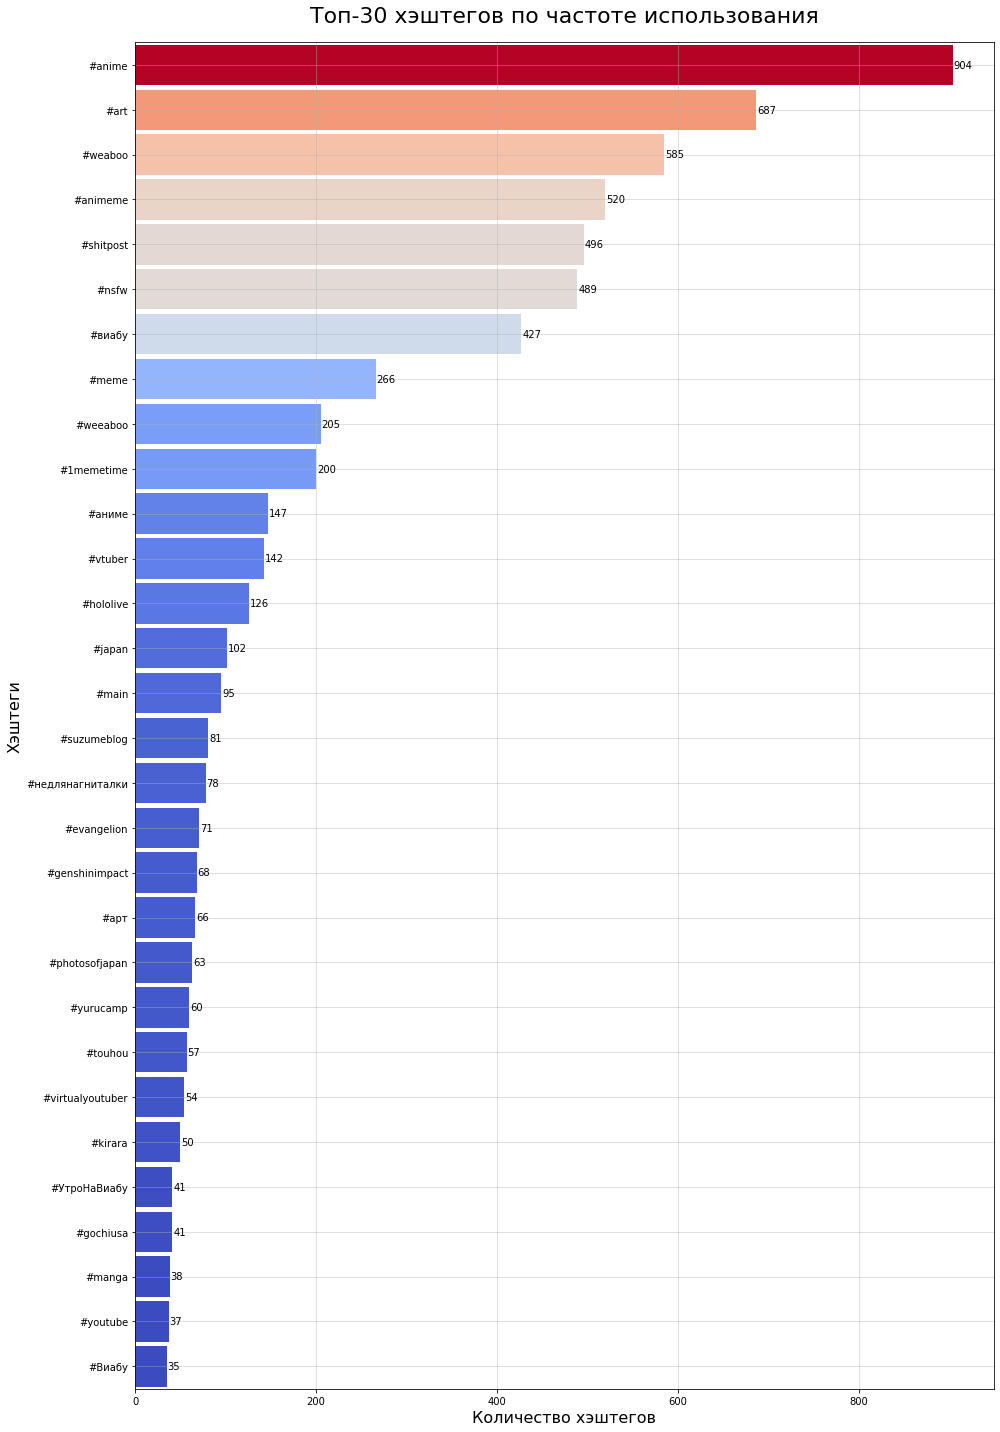

In [46]:
plt.rcParams["figure.figsize"] = [14, 20]

my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

labels = hshtgs.value_counts().head(30).index[::-1]
values = hshtgs.value_counts().head(30).values[::-1]

height = 0.9
plt.barh(y=labels, width=values, height=height, 
         color=my_cmap(rescale(values)), 
         align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество хэштегов', fontsize=16)
plt.ylabel('Хэштеги', fontsize=16)
plt.title('Топ-30 хэштегов по частоте использования', fontsize=22, pad=20)
plt.grid(True, alpha=0.5)
plt.tight_layout()

# plt.savefig(PATH + "Full_analysis/hashtags.jpg", dpi=300, bbox_inches='tight')

plt.show()

### Дни недели

In [47]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)

In [48]:
df["hour"] = df.index.hour
df["month"] = df.index.month
df["weekday"] = df.index.day_name() #.weekday
df['is_weekend'] = df.weekday.isin(['Saturday',  'Sunday'])*1

In [49]:
df.sort_index(inplace=True)
df.head(15)

,id,url,author,comments_count,favorites_count,hits_count,is_repost,likes,subsite,title,...,images,videos,links,audio,total_mediacontent,hashtags,hour,month,weekday,is_weekend
date,,,,,,,,,,,,,,,,,,,,,
2018-03-12 21:59:15,17110,https://dtf.ru/flood/17110-ne-odin-lish-tip-luny,"{'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...",19,32,1990,True,36,Офтоп,Не один лишь тип луны,...,42,3,0,0,45,[#long],21,3,Monday,0
2020-01-26 20:38:21,97215,https://dtf.ru/u/92907-aleksey-fedorov/97215-t...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",11,47,664,True,56,Алексей Фёдоров,Тяночки в наших реалиях,...,17,0,0,0,17,[#anime],20,1,Sunday,1
2020-02-18 19:11:46,104163,https://dtf.ru/u/92907-aleksey-fedorov/104163-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",39,23,749,True,49,Алексей Фёдоров,Евангелион навсегда: Аска,...,32,0,0,0,32,"[#anime, #evangelion]",19,2,Tuesday,0
2020-02-29 18:25:10,108055,https://dtf.ru/u/92907-aleksey-fedorov/108055-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",7,18,238,True,41,Алексей Фёдоров,Милодевье в цветах неона,...,19,0,1,0,20,[#anime],18,2,Saturday,1
2020-03-16 10:36:03,113363,https://dtf.ru/u/4810-oleg-kubaneishvili/11336...,"{'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...",5,8,180,True,15,Олег Кубанеишвили,Мнение о сериале Violet Evergarden,...,17,0,0,0,17,[],10,3,Monday,0
2020-06-22 12:06:01,155471,https://dtf.ru/anime/155471-obeshchannyy-never...,"{'id': 166371, 'url': 'https://dtf.ru/u/166371...",45,33,3983,True,16,Аниме,Обещанный Неверленд круто,...,5,0,0,0,5,"[#глед\_смотрит, #глед\_читает, #promisednever...",12,6,Monday,0
2020-07-13 12:44:35,169901,https://dtf.ru/u/92674-ayan-myrzagali/169901-m...,"{'id': 92674, 'url': 'https://dtf.ru/u/92674-a...",5,6,155,True,27,Ayan Myrzagali,Mariya Takeuchi — Sweetest Music,...,1,1,0,0,2,"[#music, #jpop, #mariyatakeuchi]",12,7,Monday,0
2020-07-14 20:10:03,170920,https://dtf.ru/s/weaboo/170920-nu-che-pacany-a...,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...",42,4,1406,False,64,Виабу,"Ну че пацаны, аниме?",...,1,0,0,0,1,[],20,7,Tuesday,0
2020-07-14 20:49:12,170948,https://dtf.ru/s/weaboo/170948,"{'id': 92674, 'url': 'https://dtf.ru/u/92674-a...",6,1,160,False,24,Виабу,NaN,...,1,0,0,0,1,[],20,7,Tuesday,0


In [50]:
subset_posts = df.resample('D').apply({'id':'count'})
subset_posts = subset_posts[subset_posts.index > '2020-07-14']
subset_posts.head()

,id
date,
2020-07-15,55
2020-07-16,46
2020-07-17,39
2020-07-18,28
2020-07-19,44


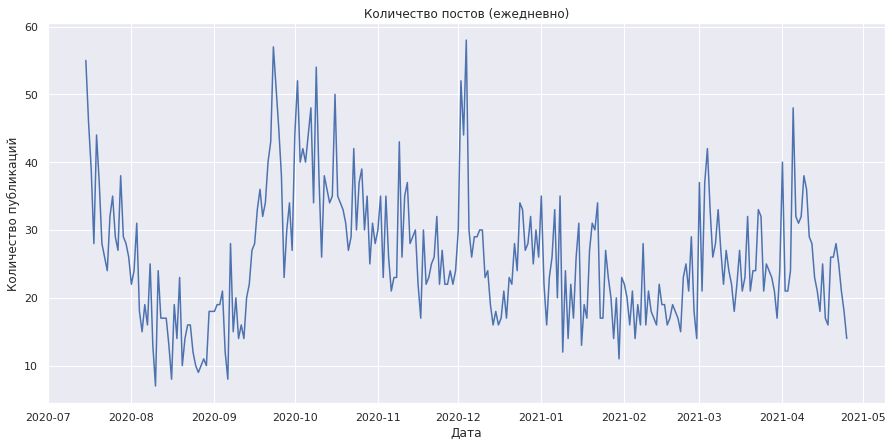

In [51]:
sns.set_theme()
plt.figure(figsize=(15, 7))
sns.lineplot(data=subset_posts, x=subset_posts.index, y=subset_posts.id)
plt.title('Количество постов (ежедневно)')
plt.ylabel('Количество публикаций')
plt.xlabel('Дата')
plt.grid(True)
# plt.savefig(PATH + "Full_analysis/posts_by_day_din.jpg", dpi=300, bbox_inches='tight')

In [52]:
subset_com = df.resample('D').apply({'comments_count':'sum'})
subset_com = subset_com[subset_com.index > '2020-07-14']

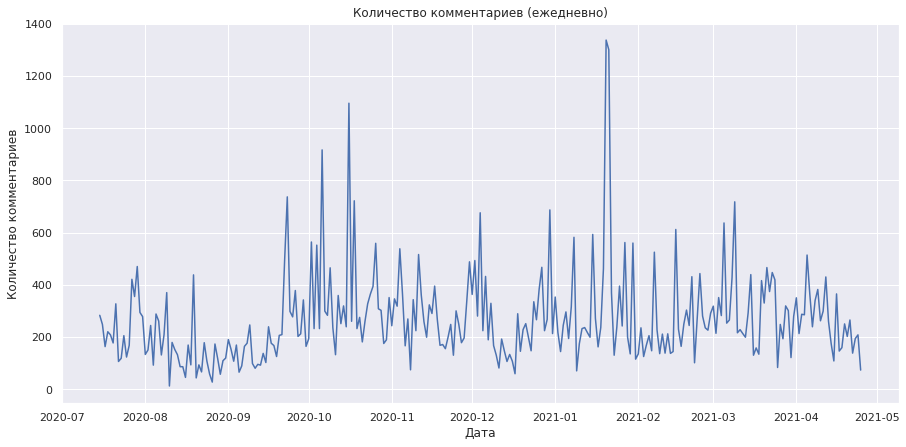

In [53]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=subset_com, x=subset_com.index, y=subset_com.comments_count)
plt.title('Количество комментариев (ежедневно)')
plt.ylabel('Количество комментариев')
plt.xlabel('Дата')
plt.grid(True)
# plt.savefig(PATH + "Full_analysis/comments_by_day_din.jpg", dpi=300, bbox_inches='tight')

https://stackoverflow.com/questions/42473304/how-do-i-group-rows-by-month-in-a-pandas-dataframe

<AxesSubplot:xlabel='period', ylabel='hits_count'>

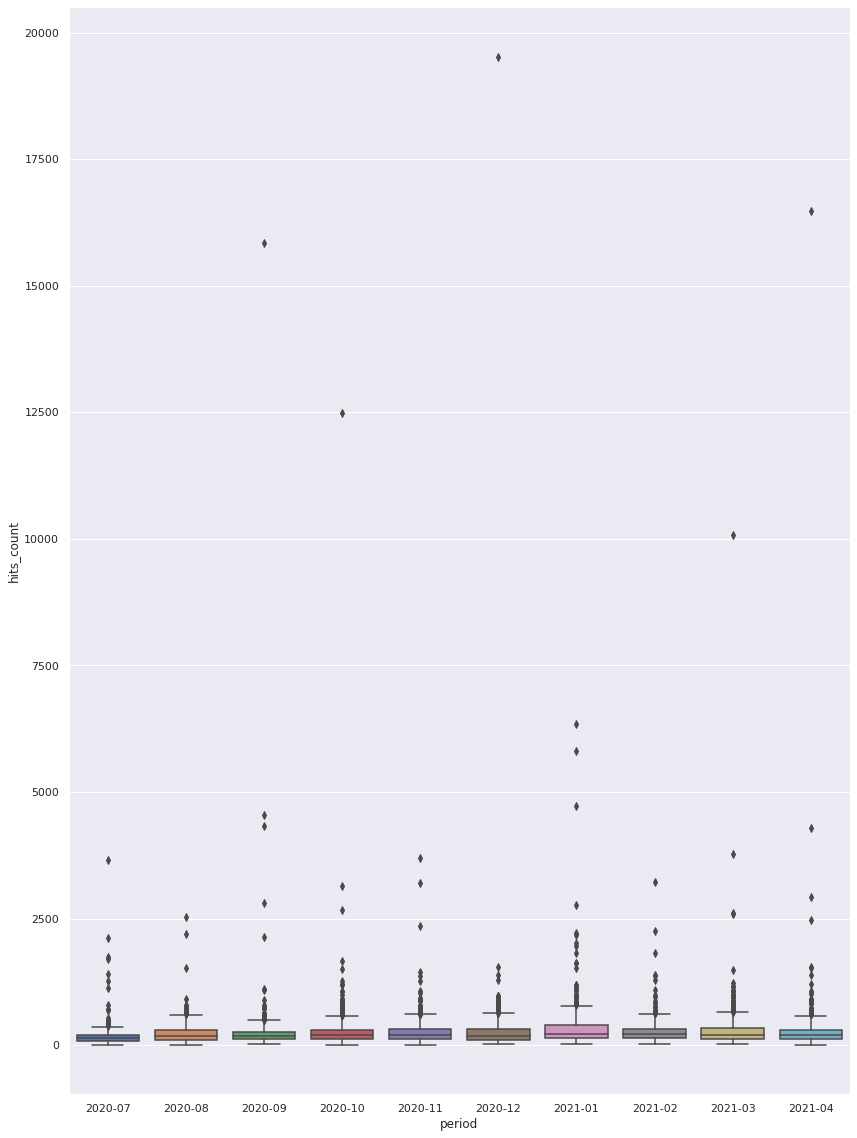

In [54]:
df['period'] = df.index.to_period('M')
sns.boxplot(data=df[df.is_repost == False], x = 'period', y='hits_count')

### Группировка по дням недели

In [55]:
df.groupby(['weekday'])['id'].count().values

array([1184, 1084,  947,  948, 1091, 1020, 1143])

In [56]:
df.weekday.value_counts().values

array([1184, 1143, 1091, 1084, 1020,  948,  947])

In [57]:
df.weekday.value_counts().sort_index()

Friday       1184
Monday       1084
Saturday      947
Sunday        948
Thursday     1091
Tuesday      1020
Wednesday    1143
Name: weekday, dtype: int64

In [58]:
df.groupby(['weekday']).count()

,id,url,author,comments_count,favorites_count,hits_count,is_repost,likes,subsite,title,...,images,videos,links,audio,total_mediacontent,hashtags,hour,month,is_weekend,period
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,1184,1184,1184,1184,1184,1184,1184,1184,1184,642,...,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184
Monday,1084,1084,1084,1084,1084,1084,1084,1084,1084,575,...,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084
Saturday,947,947,947,947,947,947,947,947,947,484,...,947,947,947,947,947,947,947,947,947,947
Sunday,948,948,948,948,948,948,948,948,948,463,...,948,948,948,948,948,948,948,948,948,948
Thursday,1091,1091,1091,1091,1091,1091,1091,1091,1091,564,...,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091
Tuesday,1020,1020,1020,1020,1020,1020,1020,1020,1020,557,...,1020,1020,1020,1020,1020,1020,1020,1020,1020,1020
Wednesday,1143,1143,1143,1143,1143,1143,1143,1143,1143,583,...,1143,1143,1143,1143,1143,1143,1143,1143,1143,1143


In [ ]:
# sns.barplot(x=df.weekday.value_counts().index, y=df.groupby(['weekday'])['id'].count().values)

https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib

In [59]:
df.groupby("weekday")["id"].count().mean()

1059.5714285714287

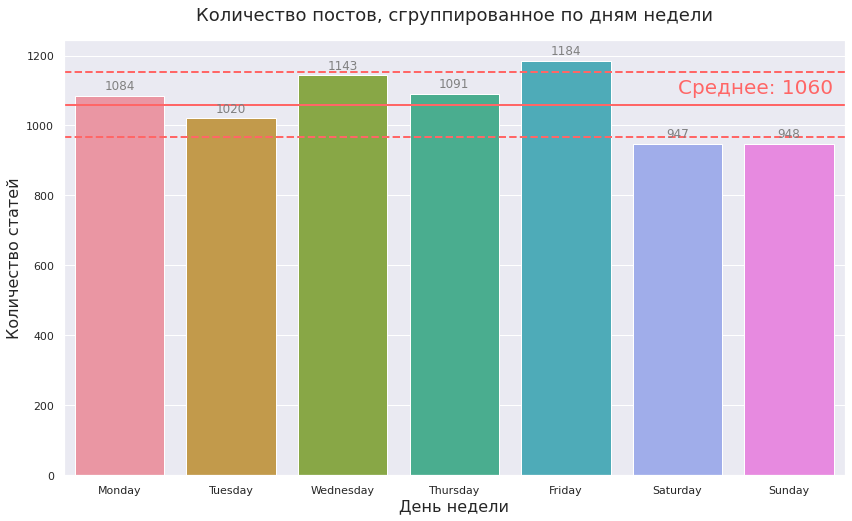

In [60]:
from pandas.api.types import CategoricalDtype

plt.figure(figsize=(14, 8))

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['weekday'] = df['weekday'].astype(cat_type)

sns.set_palette('hls')

ax = sns.barplot(data=df, x=df.groupby("weekday")["id"].count().sort_index().index, 
            y=df.groupby("weekday")["id"].count().sort_index().values)



for p in ax.patches:
    ax.annotate("%.1d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='gray', xytext=(0, 10),
                 textcoords='offset points')  

plt.axhline(df.groupby("weekday")["id"].count().mean(), color='#ff6666', linestyle='-', linewidth=2)    
plt.text(5.0, df.groupby("weekday")["id"].count().mean()*1.03, 
         'Среднее: {:.0f}'.format(df.groupby("weekday")["id"].count().mean()), color='#ff6666', fontsize=20)
plt.axhline(df.groupby("weekday")["id"].count().mean() + df.groupby("weekday")["id"].count().std(), 
            color='#ff6666', linestyle='--', linewidth=2)
plt.axhline(df.groupby("weekday")["id"].count().mean() - df.groupby("weekday")["id"].count().std(), 
            color='#ff6666', linestyle='--', linewidth=2)
        
ax.set_title('Количество постов, сгруппированное по дням недели', fontsize=18, pad=20)
ax.set_xlabel('День недели', fontsize='16')
ax.set_ylabel('Количество статей', fontsize='16');

# plt.savefig(PATH + "Full_analysis/posts_by_day_sum.jpg", dpi=300, bbox_inches='tight')

### Возвращаемся к EDA

In [61]:
df.reset_index(inplace=True)
df.head()

,date,id,url,author,comments_count,favorites_count,hits_count,is_repost,likes,subsite,...,videos,links,audio,total_mediacontent,hashtags,hour,month,weekday,is_weekend,period
0,2018-03-12 21:59:15,17110,https://dtf.ru/flood/17110-ne-odin-lish-tip-luny,"{'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...",19,32,1990,True,36,Офтоп,...,3,0,0,45,[#long],21,3,Monday,0,2018-03
1,2020-01-26 20:38:21,97215,https://dtf.ru/u/92907-aleksey-fedorov/97215-t...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",11,47,664,True,56,Алексей Фёдоров,...,0,0,0,17,[#anime],20,1,Sunday,1,2020-01
2,2020-02-18 19:11:46,104163,https://dtf.ru/u/92907-aleksey-fedorov/104163-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",39,23,749,True,49,Алексей Фёдоров,...,0,0,0,32,"[#anime, #evangelion]",19,2,Tuesday,0,2020-02
3,2020-02-29 18:25:10,108055,https://dtf.ru/u/92907-aleksey-fedorov/108055-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",7,18,238,True,41,Алексей Фёдоров,...,0,1,0,20,[#anime],18,2,Saturday,1,2020-02
4,2020-03-16 10:36:03,113363,https://dtf.ru/u/4810-oleg-kubaneishvili/11336...,"{'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...",5,8,180,True,15,Олег Кубанеишвили,...,0,0,0,17,[],10,3,Monday,0,2020-03


In [62]:
df.shape

(7417, 32)

In [63]:
df[df.author_type == 3]

,date,id,url,author,comments_count,favorites_count,hits_count,is_repost,likes,subsite,...,videos,links,audio,total_mediacontent,hashtags,hour,month,weekday,is_weekend,period
6202,2021-03-08 21:37:07,665947,https://dtf.ru/anime/665947-mangaki-scenaristk...,"{'id': 256351, 'url': 'https://dtf.ru/crunchyr...",90,221,4298,True,209,Аниме,...,0,0,0,21,"[#лонгрид, #аниме, #манга, #индустрия]",21,3,Monday,0,2021-03


In [64]:
df.loc[df[(df.author_type == 3)].index, 'author_type'] = 2

In [65]:
df.head()

,date,id,url,author,comments_count,favorites_count,hits_count,is_repost,likes,subsite,...,videos,links,audio,total_mediacontent,hashtags,hour,month,weekday,is_weekend,period
0,2018-03-12 21:59:15,17110,https://dtf.ru/flood/17110-ne-odin-lish-tip-luny,"{'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...",19,32,1990,True,36,Офтоп,...,3,0,0,45,[#long],21,3,Monday,0,2018-03
1,2020-01-26 20:38:21,97215,https://dtf.ru/u/92907-aleksey-fedorov/97215-t...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",11,47,664,True,56,Алексей Фёдоров,...,0,0,0,17,[#anime],20,1,Sunday,1,2020-01
2,2020-02-18 19:11:46,104163,https://dtf.ru/u/92907-aleksey-fedorov/104163-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",39,23,749,True,49,Алексей Фёдоров,...,0,0,0,32,"[#anime, #evangelion]",19,2,Tuesday,0,2020-02
3,2020-02-29 18:25:10,108055,https://dtf.ru/u/92907-aleksey-fedorov/108055-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",7,18,238,True,41,Алексей Фёдоров,...,0,1,0,20,[#anime],18,2,Saturday,1,2020-02
4,2020-03-16 10:36:03,113363,https://dtf.ru/u/4810-oleg-kubaneishvili/11336...,"{'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...",5,8,180,True,15,Олег Кубанеишвили,...,0,0,0,17,[],10,3,Monday,0,2020-03


In [66]:
df.columns

Index(['date', 'id', 'url', 'author', 'comments_count', 'favorites_count',
       'hits_count', 'is_repost', 'likes', 'subsite', 'title', 'type',
       'blocks', 'repost', 'stacked_reposts_authors', 'media_content_types',
       'author_name', 'author_type', 'author_avatar_url', 'symbols', 'words',
       'images', 'videos', 'links', 'audio', 'total_mediacontent', 'hashtags',
       'hour', 'month', 'weekday', 'is_weekend', 'period'],
      dtype='object')

In [67]:
df.drop(columns=['stacked_reposts_authors', 'type'], inplace=True)

In [68]:
df.to_csv(PATH + 'Full_analysis/Prepared_weaboo_data_25_04.csv')

In [69]:
df.to_pickle(PATH + 'Full_analysis/Prepared_weaboo_data_25_04.pkl')

https://stackoverflow.com/questions/18982584/inconsistency-in-saving-and-loading-pandas-dataframe-with-lists-as-values

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7417 entries, 0 to 7416
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 7417 non-null   datetime64[ns]
 1   id                   7417 non-null   int64         
 2   url                  7417 non-null   object        
 3   author               7417 non-null   object        
 4   comments_count       7417 non-null   int64         
 5   favorites_count      7417 non-null   int64         
 6   hits_count           7417 non-null   int64         
 7   is_repost            7417 non-null   bool          
 8   likes                7417 non-null   int64         
 9   subsite              7417 non-null   object        
 10  title                3868 non-null   object        
 11  blocks               7417 non-null   object        
 12  repost               892 non-null    object        
 13  media_content_types  7417 non-nul

In [ ]:
def fancy_pie_chart(srs: pd.Series, title: str, path: str, donut_hole=0.3, labels=['Пост подсайта \nАвтор - пользователь', 'Пост подсайта \nАвтор - подсайт', 
              'Репост \nАвтор - пользователь', 'Репост \nАвтор - подсайт']):
    """Function for plotting pie_chart (matplotlib) with custom settings.
    
    Parameters
    ----------
    srs : pd.Series
        Data for which the histogram is plotted. 
        
    title : str
        Title for piechart.
        
    path : str, 
        Path for saving image.
        
    donut_hole : float, default=0.3
        Size of hole in center of chart.
    
    labels : list, default=['Пост подсайта \nАвтор - пользователь', 'Пост подсайта \nАвтор - подсайт', 
              'Репост \nАвтор - пользователь', 'Репост \nАвтор - подсайт']
        List of values for displaying on chart.

    Returns
    -------
        None. Printing pie_chart.
    
    """

    def func(pct, allvals):
        absolute = round(pct/100.*np.sum(allvals))
        return "{:.1f}%\n{:d} comments".format(pct, absolute)

    fig=plt.figure(figsize=(14,10))
    gs1 = gridspec.GridSpec(1,1,
        left=0.1,right=0.7,
        bottom=0.1,top=0.7,
    )

    pie_ax=fig.add_subplot(gs1[0])

    labels = labels # tmp.author_type.values  
    zero_list = [0]
    
    # Create a pie chart
    wedges = pie_ax.pie(
        srs,
        shadow=False,
        startangle=45, #frame=True, 
        autopct=lambda pct: func(pct, srs), 
        explode=zero_list + [0.05] * (len(labels) - 1)
    )

    bbox_props = dict(boxstyle="square, pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

    for i, p in enumerate(wedges[0]):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle, "color":'k'})
        pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                     horizontalalignment=horizontalalignment, **kw)


    centre_circle = plt.Circle((0,0), donut_hole, color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title(title, fontsize=22, pad=20)
    plt.axis('equal')
    plt.savefig(PATH + "Full_analysis/" + path, dpi=300, bbox_inches='tight')
    plt.show()
    
    pass

In [ ]:
sns.set_palette("husl", 8)
fancy_pie_chart(tmp.comments_count, 'Общее количество комментариев у публикаций', 'test_1.jpg', donut_hole=0.9)

In [ ]:
from plotnine import *
from plotnine.data import *

https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_violin.html?highlight=violin#violins-boxes-points-and-lines

In [ ]:
(ggplot(df, aes(x=df.is_repost, y=df.likes, fill=df.is_repost)) + geom_violin(show_legend=False) + geom_boxplot(width = .2)
+ scale_fill_manual(values=['dodgerblue', 'darkorange'])
+ theme_classic()
+ theme(figure_size=(8, 6))
)

In [ ]:
df[df.title == 'Статья удалена'].shape[0]

In [ ]:
df[df.title == 'Статья удалена'].author_name.unique()

In [ ]:
df[sum([df.images, df.videos, df.links]) == 0].symbols.unique()

In [ ]:
df[df.total_mediacontent == 0].symbols.unique()

In [ ]:
df.total_mediacontent.value_counts(normalize=True, sort=True)

In [ ]:
df.shape[0]

## END OF TEST

In [ ]:
# sns.displot(x=df.symbols, y=df.total_mediacontent, col='is_repost', data=df)

In [ ]:
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue='is_repost', data=df)

In [ ]:
# sns.histplot(data=df, x=df.total_mediacontent, kde=True)

In [ ]:
# sns.histplot(data=df, x=df.likes, kde=True)#, bins=70)

# CLUSTERING

In [ ]:
X = np.array([df.symbols, df.total_mediacontent]).T
X

In [ ]:
# from sklearn.cluster import KMeans
# from sklearn import metrics

# inertia = []
# k = range(1, 10)
# for k_i in k:
#     km = KMeans(n_clusters=k_i).fit(X)
#     km.fit(X)
#     inertia.append(km.inertia_)
    
# plt.plot(k, inertia)
# plt.xlabel('k')
# plt.ylabel('inertia')
# plt.title('The Elbow Method showing the optimal k')

In [ ]:
# from sklearn.metrics import silhouette_score
# inertia = []
# k = range(2, 10)
# for k_i in k:
#     km = KMeans(n_clusters=k_i).fit(X)
#     km.fit(X)
#     inertia.append(silhouette_score(X, km.labels_))

# print(inertia)
    
# plt.plot(k, inertia)
# plt.xlabel('k')
# plt.ylabel('silhouette_score')
# plt.title('The Elbow Method showing the optimal k')

In [ ]:
# kmeans = KMeans(n_clusters=4, random_state=10)
# y_pred = kmeans.fit_predict(X)

# # Plot the prediction
# # plt.scatter(X[:,0], X[:,1], c=y_pred)
# sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred)
# # plt.savefig(PATH + "Full_analysis/fail_KMeans.jpg", dpi=300, bbox_inches='tight')

In [ ]:
from sklearn.cluster import DBSCAN

X = np.array([df.symbols, df.total_mediacontent]).T
X

In [ ]:
clustering = DBSCAN(eps=15, min_samples=10)
y_pred = clustering.fit_predict(X)

plt.rcParams["figure.figsize"] = [20, 16]
print(np.unique(y_pred))

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred, palette='turbo')
# plt.savefig(PATH + "Full_analysis/fail_DBSCAN_1.jpg", dpi=300, bbox_inches='tight')

### DBScan не работает при различных плотностях кластеров. Собственно это и можно наблюдать.

In [ ]:
np.unique(y_pred)

In [ ]:
# from sklearn.cluster import SpectralClustering

# X = np.array([df.symbols, df.total_mediacontent]).T
# X

Очень долго работало и не доработало до конца. Нужно попробовать в колабе.

In [ ]:
# clustering = SpectralClustering(n_clusters=5, assign_labels="discretize", affinity='rbf')
# y_pred = clustering.fit_predict(X)

# plt.rcParams["figure.figsize"] = [20, 16]
# print(np.unique(y_pred))

# sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred, palette='turbo')

In [ ]:
# from sklearn import cluster
# from sklearn.cluster import MeanShift

# bandwidth = cluster.estimate_bandwidth(X, quantile=0.2, n_samples=50)
# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# y_pred = ms.fit_predict(X)

# plt.rcParams["figure.figsize"] = [20, 16]
# print(np.unique(y_pred))

# labels = ms.labels_
# cluster_centers = ms.cluster_centers_

# labels_unique = np.unique(labels)
# n_clusters_ = len(labels_unique)

# print("number of estimated clusters : %d" % n_clusters_)

# sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred, palette='turbo')
# plt.savefig(PATH + "Full_analysis/fail_EM.jpg", dpi=300, bbox_inches='tight')

# # from itertools import cycle
# # colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
# # for k, col in zip(range(n_clusters_), colors):
# #     my_members = labels == k
# #     cluster_center = cluster_centers[k]
# #     plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
# #     plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
# #              markeredgecolor='k', markersize=14)
# # plt.title('Estimated number of clusters: %d' % n_clusters_)
# # plt.show()

Почему нормально не сошлись алгоритмы кластеризации? 
#### Потому что я сделал чушь. Основные метрики использованных алгоритмов - плотность и расстояние. Учитывая, что я не нормализировал и не стандартизировал входные данные - алгоритмы просто не могли нормально сойтись. 

Слишком высокая дисперсия по абсциссе, по отношению к дисперсию по ординате. 
#### НОРМАЛИЗАЦИЯ НУЖНА ОБЯЗАТЕЛЬНО!

Для DBSCAN важны параметры эпсилон и н_сэмплс - т. е. эпсилон-окрестность точки и количество точек, входящих в эту окрестность, которые необходимы для определения их принадлежности к одному кластеру. 

Следует также попробовать иерархическую кластеризацию на данных. 

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
X = np.array([df.symbols, df.total_mediacontent]).T
print(X)

X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)

In [ ]:
clustering = DBSCAN(eps=0.15, min_samples=7)
y_pred = clustering.fit_predict(X_scaled)

plt.rcParams["figure.figsize"] = [20, 16]
print(np.unique(y_pred))

sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_pred, palette='turbo')
# plt.savefig(PATH + "Full_analysis/fail_DBSCAN_2.jpg", dpi=300, bbox_inches='tight')

# HIERARCHIAL CLUSTERING

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

# # https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
distance_mat = pdist(X_scaled) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'ward') # linkage — реализация агломеративного алгоритма
# plt.figure(figsize=(20, 10))
# dn = hierarchy.dendrogram(Z, leaf_font_size=8., leaf_rotation=90.)

In [ ]:
from scipy.cluster.hierarchy import dendrogram

In [ ]:
plt.figure(figsize=(20, 10))
# выводим размеры кластеров

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,                   # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,   # to get a distribution impression in truncated branches
)
plt.show()

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Дендрограмма иерархической кластеризации (усечённая)')
        plt.xlabel('Индекс элемента выборки или (размер кластера)')
        plt.ylabel('Метрика расстояния алгоритма')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
plt.figure(figsize=(20, 10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)

plt.axhline(25, color='#ff6666', linestyle='-', linewidth=2)

# plt.savefig(PATH + "Full_analysis/clustering_tree.jpg", dpi=300, bbox_inches='tight')

plt.show()

## Наконец-то адекватный результат!

In [ ]:
# Зная расстояние
from scipy.cluster.hierarchy import fcluster
# max_d = 25 # Шикарный результат!
max_d = 25
clusters = fcluster(Z, max_d, criterion='distance')
print(np.unique(clusters))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusters, palette='turbo_r', legend='full')

plt.title('Кластеризованные данные', fontsize=22, pad=20)
plt.xlabel('Количество символов в публикациях', fontsize=16)
plt.ylabel('Количество медиаконтента в публикациях', fontsize=16)

# plt.savefig(PATH + "Full_analysis/clustered_data.jpg", dpi=300, bbox_inches='tight')

- Мем
- заметка
- мини_подборка
- статья
- подборка
- супер_подборка
- лонгрид
- супер_лонгрид

https://scikit-learn.org/stable/modules/mixture.html

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.inconsistent.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

https://scikit-learn.org/stable/modules/preprocessing.html



https://medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

https://stackoverflow.com/questions/36296101/donut-chart-python

https://seaborn.pydata.org/tutorial/relational.html

In [ ]:
df.head()

In [ ]:
clusters

In [ ]:
df = df.assign(type_of_post=pd.Series(clusters).values)

In [ ]:
df.head()

In [ ]:
# print(np.unique(clusters))
# print(df.type_of_post.unique())
# print(clusters == df.type_of_post)

In [ ]:
# Alternative
max_d = 25
clusters = fcluster(Z, max_d, criterion='distance')

# sns.scatterplot(x=X[:,0], y=X[:,1], hue=df.type_of_post, 
#                 style=df.is_repost, palette='turbo_r', s=50, legend='full')

sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

# Попытка настроить алгоритм на количестве слов, а не на символов

In [ ]:
X_alter = np.array([df.words, df.total_mediacontent]).T
print(X_alter)

X_alter_scaled = StandardScaler().fit_transform(X_alter)
print(X_alter_scaled)

In [ ]:
distance_mat_alter = pdist(X_alter_scaled) 
Z_alter = hierarchy.linkage(distance_mat_alter, 'ward') 

In [ ]:
plt.figure(figsize=(20, 10))
# выводим размеры кластеров

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_alter,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,                   # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,   # to get a distribution impression in truncated branches
)
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
fancy_dendrogram(
    Z_alter,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)

plt.axhline(22, color='#ff6666', linestyle='-', linewidth=2)

# plt.savefig(PATH + "Full_analysis/clustering_tree.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14, 10]

In [ ]:
# Зная расстояние
from scipy.cluster.hierarchy import fcluster
max_d = 22
clusters = fcluster(Z_alter, max_d, criterion='distance')
print(np.unique(clusters))
sns.scatterplot(x=X_alter[:,0], y=X_alter[:,1], hue=clusters, palette='turbo_r', legend='full')

plt.title('Кластеризованные данные', fontsize=22, pad=20)
plt.xlabel('Количество слов в публикациях', fontsize=16)
plt.ylabel('Количество медиаконтента в публикациях', fontsize=16)

# plt.savefig(PATH + "Full_analysis/clustered_data.jpg", dpi=300, bbox_inches='tight')

- Заметка
- Статья
- Лонгрид
- Супер_лонгрид_1
- Супер_лонгрид_2
- Ультра_лонгрид
- Подборка
- Супер_подборка
- Супер_медиа_лонгрид

In [ ]:
df.head()

In [ ]:
clusters

In [ ]:
df = df.assign(type_of_post=pd.Series(clusters).values)

In [ ]:
df.head()

In [ ]:
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

In [ ]:
sns.scatterplot(x=df.words, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

## Попытки построить поверхность. Неудачные.

In [ ]:
# df[df.symbols > 40000]

In [ ]:
# df[sum([df.images, df.videos, df.links]) > 150]

In [ ]:
# len(x_scaled)

In [ ]:
# x_scaled.reshape(6177)

In [ ]:
# # import pandas as pd
# # from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# from scipy.interpolate import griddata

# # x,y,z = df.symbols, sum([df.images, df.videos, df.links]), df.likes
# xyz = {'x': x_scaled.reshape(6177), 'y': y_scaled.reshape(6177), 'z': z_scaled.reshape(6177)}

# df_plotting = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

# # fig = plt.figure(figsize=(12, 8))
# # ax = Axes3D(fig, azim=-115, elev=15)
# # ax.plot_trisurf(df_plotting.x, df_plotting.y, df_plotting.z, cmap=cm.jet, linewidth=0.2)
# # plt.show()

# x1 = np.linspace(df_plotting['x'].min(), df_plotting['x'].max(), len(df_plotting['x'].unique()))
# y1 = np.linspace(df_plotting['y'].min(), df_plotting['y'].max(), len(df_plotting['y'].unique()))

# x2, y2 = np.meshgrid(x1, y1)

# # Interpolate unstructured D-dimensional data.
# z2 = griddata((df_plotting['x'], df_plotting['y']), df_plotting['z'], (x2, y2), method='cubic')

# # Ready to plot
# # z2
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.jet,
#                        linewidth=0, antialiased=False, vmin=np.nanmin(z2), vmax=np.nanmax(z2))
# # ax.set_zlim(-1.01, 1.01)

# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.title('Meshgrid Created from 3 1D Arrays')

# plt.show()

Эксперимент с построением 3Д-графика можно считать провалившимся. Слишком разная плотность точек, поэтому поверхность получается очень неровной. Хотя, 3Д диаграмма рассеяния, в принципе, неплоха. Только нужно добавить цвета и будет более-менее неплохо. 

https://stackoverflow.com/questions/52444555/seaborn-scatterplot-legend-not-showing

https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot



https://plotly.com/python/pie-charts/

https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

https://plotly.com/python/sunburst-charts/

https://stackoverflow.com/questions/62469436/python-plotly-sunburst-graph-opens-empty-page

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

https://stackoverflow.com/questions/55806320/how-to-add-box-and-label-to-pie-graph-exactly-as-shown-in-figure-below

https://stackoverflow.com/questions/59153347/matplotlib-pie-donut-chart-annotation-text-size

```python
from matplotlib import gridspec

custpref=pd.DataFrame({'tov_type':['Inpatient','Office Visit','Appointment Schedule','Allergy Sheet'],'count':[7,6,1,1]})

fig=plt.figure(figsize=(6,4))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
gs2 = gridspec.GridSpec(1,1,
    left=0.05,right=0.95,
    bottom=0.9,top=1.0,
)

pie_ax=fig.add_subplot(gs1[0])
title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
colors = ["#6287da","#72ac5c","#8653aa","#bb7438","#b94b75"]

# Create a pie chart
wedges, texts = pie_ax.pie(
    # using data total)arrests
    custpref['count'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with the start angle at 90%
    startangle=90,
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,"color":colors[i]})
    pie_ax.annotate(custpref['tov_type'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

# View the plot drop above
pie_ax.axis('equal')


title_ax.set_facecolor('k')

title_ax.text(0.5,0.5,"Top 5 Visit Types                  Total = 15 Visits",
    ha="center",va="center",transform=title_ax.transAxes,color="w")

for side in ['top', 'bottom', 'left', 'right']:
    title_ax.spines[side].set_visible(False)
title_ax.axes.get_xaxis().set_visible(False)    
title_ax.axes.get_yaxis().set_visible(False)    

plt.show()
```

In [ ]:
df.head()

In [ ]:
df.groupby(['is_repost', 'author_type']).agg({'id': "count"})

In [ ]:
df.groupby(['is_repost', 'author_type'], as_index=False).agg({'id': "count"})

### Эксперименты с plotly

In [ ]:
# # Import the necessaries libraries
# import plotly.offline as pyo
# import plotly.graph_objs as go
# import plotly.express as px
# # Set notebook mode to work in offline
# pyo.init_notebook_mode()
# # Create traces
# fig = px.sunburst(tmp, path=['is_repost', 'author_type'], values='id')
# # Plot it and save as basic-line.html
# # pyo.iplot(fig, filename = 'sunburst')

In [ ]:
# print(tmp.author_type.values)
# print(tmp.isRepost.values)
# print(tmp.id.values)

In [ ]:
# import plotly.graph_objects as go

# pprree = ['', '']
# pprree.extend(tmp.author_type.values)

# pre = ['', '']
# pre.extend(tmp.isRepost.values)

# fig =go.Figure(go.Sunburst(
#     labels=pprree,
#     parents=pre,
#     values=tmp.id.values
    
# ))
# # fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

# fig.show()

На 13.03.2021 Эксперимент не удался. 

# Попытки выделить мемы

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
tmp = df.groupby(['type_of_post']).agg({'id': 'count'})
tmp

In [ ]:
tmp_2 = df[(df.type_of_post == 6) & (df.total_mediacontent == 1) & (df.symbols < 30)]
tmp_2.shape

In [ ]:
sns.histplot(tmp_2.symbols)
plt.xlim(0, 50)

In [ ]:
tmp = df[(df.type_of_post == 6)]

In [ ]:
sns.scatterplot(tmp.symbols, tmp.total_mediacontent)

In [ ]:
df.type_of_post.unique()

In [ ]:
len(df.type_of_post.unique())

In [ ]:
# plt.figure(figsize=[16,14])
# sns.scatterplot(x=np.log(df.symbols + 1), y=np.log(df.total_mediacontent +1), hue=df.type_of_post, 
#                 style=df.is_repost, palette='turbo_r', s=50, legend='full')

In [ ]:
plt.figure(figsize=[8,6])
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.replace({'type_of_post': {1: "Ультра-Медиа-Логрид", 2: "Ультра-Логрид", 3: "Супер-Лонгрид-1", 
                                  4: "Супер-Лонгрид-2", 5: "Статья", 6: "Заметка", 
                                  7: "Ультра-Подборка", 8: "Лонгрид", 9: "Подборка"}}, inplace=True)

In [ ]:
plt.figure(figsize=[14, 10])
sns.scatterplot(x=df_copy.symbols, y=df_copy.total_mediacontent, hue=df_copy.type_of_post, 
                palette='turbo', s=50, legend='full')

plt.title('Кластеризованные данные', fontsize=22, pad=20)
plt.xlabel('Количество символов в публикациях', fontsize=16)
plt.ylabel('Количество медиаконтента в публикациях', fontsize=16)
plt.legend(title='Типы публикаций')

# plt.savefig(PATH + "Full_analysis/clustered_labeled_data.jpg", dpi=300, bbox_inches='tight')

In [ ]:
df_copy.loc[df_copy[(df_copy.type_of_post == 'Заметка') & (df_copy.total_mediacontent == 1) & 
                    (df_copy.symbols < 30)].index, 'type_of_post'] = 'Мем'
df_copy.loc[df_copy[(df_copy.type_of_post == "Супер-Лонгрид-1")].index, 'type_of_post'] = "Супер-Лонгрид-2"

In [ ]:
df_copy.replace({'type_of_post': {"Супер-Лонгрид-2": "Супер-Лонгрид"}}, inplace=True)

In [ ]:
len(df_copy.type_of_post.unique())

In [ ]:
df_copy.type_of_post.unique()

In [ ]:
plt.figure(figsize=[18,16])
sns.scatterplot(x=df_copy.symbols, y=df_copy.total_mediacontent, hue=df_copy.type_of_post, 
                style=df_copy.is_repost, palette='turbo_r', s=50, legend='full')

In [ ]:
plt.figure(figsize=[16,14])
sns.scatterplot(x=np.log(df_copy.symbols + 1), y=np.log(df_copy.total_mediacontent +1), hue=df_copy.type_of_post, 
                style=df_copy.is_repost, palette='turbo_r', s=50, legend='full')

In [ ]:
# plt.figure(figsize=[14, 10])
# sns.scatterplot(x=df_copy.symbols, y=df_copy.total_mediacontent, hue=df_copy.type_of_post, 
#                 palette='magma_r', s=25, legend='full')

# plt.title('Кластеризованные данные', fontsize=22, pad=20)
# plt.xlabel('Количество символов в публикациях', fontsize=16)
# plt.ylabel('Количество медиаконтента в публикациях', fontsize=16)
# plt.legend(title='Типы публикаций')

In [ ]:
df_copy.type_of_post.unique()

In [ ]:
df_copy[df_copy.type_of_post == 'Мем']

In [ ]:
tmp = df_copy[(df_copy.type_of_post == 'Мем')]
print(tmp.shape)
sns.scatterplot(tmp.symbols, tmp.total_mediacontent)

---

---

---

In [ ]:
df.type_of_post.unique()

In [ ]:
plt.figure(figsize=[8,6])
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

In [ ]:
df.replace({'type_of_post': {1: "Ультра-Медиа-Логрид", 2: "Ультра-Логрид", 3: "Супер-Лонгрид-1", 
                                  4: "Супер-Лонгрид-2", 5: "Статья", 6: "Заметка", 
                                  7: "Ультра-Подборка", 8: "Лонгрид", 9: "Подборка"}}, inplace=True)

In [ ]:
df.type_of_post.unique()

In [ ]:
plt.figure(figsize=[8,6])
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

In [ ]:
# ДЛЯ ПОСТРОЕНИЯ НОРМАЛЬНОГО ГРАФИКА ВЫБРАН ПОРОГ ПО СИМВОЛАМ: 100. 
# ЗАМЕНИТЬ НА 30 ПОСЛЕ ПОСТРОЕНИЯ ГРАФИКА

df.loc[df[(df.type_of_post == 'Заметка') & (df.total_mediacontent == 1) & 
                    (df.symbols < 30)].index, 'type_of_post'] = 'Мем'
df.loc[df[(df.type_of_post == "Супер-Лонгрид-1")].index, 'type_of_post'] = "Супер-Лонгрид-2"
df.replace({'type_of_post': {"Супер-Лонгрид-2": "Супер-Лонгрид"}}, inplace=True)

In [ ]:
plt.figure(figsize=[18,16])
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

plt.title('Кластеризованные данные', fontsize=22, pad=20)
plt.xlabel('Количество символов в публикациях', fontsize=16)
plt.ylabel('Количество медиаконтента в публикациях', fontsize=16)
plt.legend(title='Типы публикаций', )

# plt.savefig(PATH + "Full_analysis/clustered_labeled_data_final.jpg", dpi=300, bbox_inches='tight')

In [ ]:
df[df.type_of_post == 'Мем'].shape

In [ ]:
len("Интересно, в этой строке наберётся сто символов или нет?")

In [ ]:
print(df.type_of_post.value_counts())
print('\n')
print(df.type_of_post.value_counts().index)
print('\n')
print(df.type_of_post.value_counts().values)

In [ ]:
tmp = df.type_of_post.value_counts()
tmp

In [ ]:
tmp.values.sum()

In [ ]:
sns.set_palette("viridis_r")

def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} medias".format(pct, absolute)

fig=plt.figure(figsize=(14,10))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
# colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff6666']
labels = tmp.index 

# Create a pie chart
wedges = pie_ax.pie(
    tmp.values,
    shadow=False,
#     colors=colors, 
    startangle=45, #frame=True, 
    autopct=lambda pct: func(pct, tmp.values), 
    explode=(0, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges[0]):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,
#                              "color":colors[i]
                            "color":'k'
                            })
    pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


centre_circle = plt.Circle((0,0), 0.88, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Количество публикаций различных типов', fontsize=22, pad=26)

plt.axis('equal')

plt.savefig(PATH + "Full_analysis/medias.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
from pywaffle import Waffle

labels = tmp.index
d = {lab: val for lab, val in zip(labels, tmp.values)}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=60, 
    values=list(tmp.values),
#     labels=labels,
    title={
        'label': 'Количество публикаций различных типов',
        'loc': 'center',
        'fontdict': {
            'fontsize': 20
        }
    },
#     labels=[f"{k} ({int(v / sum(d.values()) * 100)}%)" for k, v in d.items()],
    legend={
        'labels': [f"{k} ({v} единиц, {round(v/sum(d.values())*100,2)}%)" for k, v in d.items()],  # labels could also be under legend instead
        'loc': 'lower left',
        'bbox_to_anchor': (0.1, -0.15),
        'ncol': 3,
        'framealpha': 0,
        'fontsize': 12
    },
    figsize=(35, 10),
#     legend={'bbox_to_anchor': (1.3, 0.85)}    
)
# plt.savefig(PATH + "Full_analysis/types_of_posts.jpg", dpi=300, bbox_inches='tight')

In [ ]:
tmp

In [ ]:
(tmp.values[0]) / tmp.values.sum()

In [ ]:
df.to_csv(PATH + 'Full_analysis/Full_weaboo_data_02_04.csv')

---


---


---


In [ ]:
plot = sns.relplot(x=df_copy.symbols, y=df_copy.total_mediacontent, hue=df_copy.type_of_post, 
                   col=df_copy.is_repost, style=df_copy.is_repost, palette='turbo_r', s=50, legend='full')

plt.figure(figsize=[20, 16])
axes = plot.axes.flatten()

axes[0].set_title("Пост подсайта")
axes[0].set_xlabel('Количество символов')
axes[0].set_ylabel('Количество медиаконтента')

axes[1].set_title("Репост")
axes[1].set_xlabel('Количество символов')
axes[1].set_ylabel('Количество медиаконтента')

# plt.savefig(PATH + "Full_analysis/compared_types_of_posts.jpg", dpi=300, bbox_inches='tight')

In [ ]:
len(df.type_of_post.unique())

In [ ]:
sns.catplot(data=df, x='is_repost', y='likes', hue='type_of_post', kind='box', height=9, aspect=14/9)
plt.xlabel('Тип публикации', fontsize=16)
plt.ylabel('Лайки', fontsize=16)
plt.title('Боксплоты для различных категорий публикаций', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "Full_analysis/box_likes_1.jpg", dpi=300, bbox_inches='tight')

In [ ]:
sns.catplot(data=df, x='type_of_post', y='likes', hue='is_repost', kind='box', 
            height=8.27, aspect=14/8.27, legend=False)
plt.xlabel('Тип публикации', fontsize=16)
plt.ylabel('Лайки', fontsize=16)
plt.title('Боксплоты для различных категорий публикаций', fontsize=22, pad=20)
plt.legend(loc='upper right')
plt.tight_layout()

# plt.savefig(PATH + "Full_analysis/box_likes_2.jpg", dpi=300, bbox_inches='tight')

In [ ]:
sns.boxplot(data=df, x='type_of_post', y='hits_count')
plt.ylim(0, 15000)

In [ ]:
sns.boxplot(data=df, x='type_of_post', y='comments_count')

# Регрессия

In [ ]:
PATH = "/home/aleksey/PycharmProjects/DTF_database_and_scrapper_config/"

In [ ]:
# df = pd.read_csv(PATH + 'Full_analysis/Full_weaboo_data_02_04.csv', index_col=0)
# df.head()

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.is_repost = df.is_repost.astype(int)

In [ ]:
df.columns

In [ ]:
df_reg = df.copy()

In [ ]:
df_reg.head()

In [ ]:
df_reg_categorial = pd.get_dummies(df['type_of_post'], drop_first=True, prefix='type')
df_reg = pd.concat([df_reg.drop('type_of_post',axis=1), df_reg_categorial], axis=1)

In [ ]:
df_reg_cat_weekday = pd.get_dummies(df['weekday'], drop_first=True, prefix='day')
df_reg = pd.concat([df_reg.drop('weekday',axis=1), df_reg_cat_weekday], axis=1)

In [ ]:
df_reg.columns

In [ ]:
num_vars_wo_target = [#'hits_count', 'comments_count', 'favorites_count',

       'is_repost', 'words', 'images', 'videos', 'links', 'audio', #'total_mediacontent', 
       'is_weekend', 'type_Лонгрид', 'type_Мем',
       'type_Подборка', 'type_Статья', 'type_Супер-Лонгрид',
       'type_Ультра-Логрид', 'type_Ультра-Медиа-Логрид',
       'type_Ультра-Подборка', 'day_Tuesday', 'day_Wednesday', 'day_Thursday',
       'day_Monday', 'day_Saturday', 'day_Sunday']

In [ ]:
df_reg = pd.concat([df_reg[num_vars_wo_target], df_reg.likes], axis=1)
df_reg.head()

In [ ]:
df_reg[num_vars_wo_target].head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_reg.drop(['likes'], axis=1), 
                                                    df_reg['likes'], 
                                                    test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_numeric = scaler.fit_transform(X_train[num_vars_wo_target])
X_test_scaled_numeric = scaler.transform(X_test[num_vars_wo_target])

In [ ]:
X_train[num_vars_wo_target] = X_train_scaled_numeric
X_test[num_vars_wo_target] = X_test_scaled_numeric

In [ ]:
y_test.head()

In [ ]:
X_train.head()

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred) * 100)
    pass

In [ ]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им цену всех квартир в тестовой выборке
y_pred_naive[:5]

In [ ]:
print_metrics(y_test, y_pred_naive)

In [ ]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

In [ ]:
print_metrics(y_test, y_pred_regr)

In [ ]:
feature_importance = pd.DataFrame({"feature": df_reg.drop('likes',axis=1).columns, 
                                  "importance": model_regression.coef_})

feature_importance.set_index('feature', inplace=True)
feature_importance.sort_values(["importance"], ascending=False, inplace=True)

plt.figure(figsize=(14, 10))
fe = sns.barplot(data=feature_importance, y="importance", x=feature_importance.index)

for item in fe.get_xticklabels():
    item.set_rotation(90)

In [ ]:
feature_importance

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Решётака для перебора параметра 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1]}

# Объявили модель 
model_lasso = Lasso() 

# Объявили перебор 
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso = grid_cv_lasso.predict(X_test)

In [ ]:
grid_cv_lasso.best_estimator_.intercept_, grid_cv_lasso.best_estimator_.coef_

In [ ]:
print_metrics(y_test, y_pred_lasso)

In [ ]:
feature_importance = pd.DataFrame({"feature": df_reg.drop('likes',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

feature_importance.set_index('feature', inplace=True)
feature_importance.sort_values(["importance"], ascending=False, inplace=True)

plt.figure(figsize=(14, 10))
fe = sns.barplot(data=feature_importance, y="importance", x=feature_importance.index)

for item in fe.get_xticklabels():
    item.set_rotation(90)
    
# plt.savefig(PATH + "Full_analysis/features_importance.jpg", dpi=300, bbox_inches='tight')

Базовый тип - заметка, базовый день - понедельник.

In [ ]:
feature_importance

In [ ]:
from sklearn.linear_model import ElasticNetCV

# Объявили модель
elastic_cv = ElasticNetCV(cv=5) 

# Обучили модель на тренировочной выборке 
elastic_cv.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_elastic = elastic_cv.predict(X_test)

feature_importance = pd.DataFrame({"feature": df_reg.drop('likes',axis=1).columns, 
                                  "importance": elastic_cv.coef_})

feature_importance.set_index('feature', inplace=True)
feature_importance.sort_values(["importance"], ascending=False, inplace=True)

plt.figure(figsize=(14, 10))
fe = sns.barplot(data=feature_importance, y="importance", x=feature_importance.index)

for item in fe.get_xticklabels():
    item.set_rotation(90)
    
# plt.savefig(PATH + "Full_analysis/features_importance.jpg", dpi=300, bbox_inches='tight')

In [ ]:
print_metrics(y_test, y_pred_elastic)

In [ ]:
# df_reg.drop(['comments_count', 'favorites_count', 'hits_count', 'date', 'id', 'url', 'author', 'subsite', 'title', 'blocks', 'repost', 'stacked_reposts_authors', 
#              'media_content_types', 'author_name', 'author_avatar_url', 'words', 'hashtags', 'period'
#             ], axis=1, inplace=True)

In [ ]:
# df_reg.head()

In [ ]:
# df_reg.columns

In [ ]:
# from sklearn.model_selection import train_test_split
# df_train, df_test = train_test_split(df_reg, test_size = 0.3)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # объявили скалировщик!
# scaler = StandardScaler()

# # учим скалировщик скалировать все переменны на трэйне
# scaler.fit(df_train.loc[:, ['likes', 'author_type', 'symbols', 
#                             'images', 'videos', 'links', 'audio','total_mediacontent', 'hour', 'month']]) 

In [ ]:
# # Применяем скалировщик к трэйну
# df_train_scale = scaler.transform(df_train.loc[:, [
#                                                    'likes', 'author_type', 'symbols', 'images', 'videos', 'links',
#                                                    'audio','total_mediacontent', 'hour', 'month']])

# # Применяем скалирвощик к тесту 
# df_test_scale = scaler.transform(df_test.loc[:, [
#                                                    'likes', 'author_type', 'symbols', 'images', 'videos', 'links',
#                                                    'audio','total_mediacontent', 'hour', 'month']])

In [ ]:
# df_train.loc[:, ['likes', 'author_type', 'symbols', 
#                     'images', 'videos', 'links', 'audio','total_mediacontent', 'hour', 'month']] = df_train_scale
# df_test.loc[:, ['likes', 'author_type', 'symbols', 
#                     'images', 'videos', 'links', 'audio','total_mediacontent', 'hour', 'month']] = df_test_scale

In [ ]:
# df_train.head()

In [ ]:
# print(df_train.shape)
# print(df_test.shape)  

In [ ]:
# y_train = df_train.likes 
# y_test = df_test.likes 

# X_train = df_train.drop('likes', axis=1).to_numpy()
# X_test = df_test.drop('likes', axis=1).to_numpy()

In [ ]:
# y_mean = np.mean(y_train)                     # посчитали среднее 
# y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им цену всех квартир в тестовой выборке
# y_pred_naive[:5]

In [ ]:
from sklearn import metrics  # подгружаем метрики
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred) * 100)
    pass

In [ ]:
# print_metrics(y_test, y_pred_naive)

In [ ]:
# from sklearn.linear_model import LinearRegression

# # Объявили модель
# model_regression = LinearRegression()

# # Обучили модель на тренировочной выборке 
# model_regression.fit(X_train, y_train)

# # Сделали прогнозы на тестовой выборке 
# y_pred_regr = model_regression.predict(X_test)

In [ ]:
# print_metrics(y_test,y_pred_regr)

In [ ]:
# model_regression.intercept_, model_regression.coef_

In [ ]:
# feature_importance = pd.DataFrame({"feature": df_reg.drop('likes',axis=1).columns, 
#                                   "importance": model_regression.coef_})

# feature_importance.set_index('feature', inplace=True)
# feature_importance.sort_values(["importance"], ascending=False, inplace=True)
# plt.figure(figsize=(14, 10))
# fe = sns.barplot(data=feature_importance, y="importance", x=feature_importance.index)

# for item in fe.get_xticklabels():
#     item.set_rotation(90)

In [ ]:
# feature_importance

---

In [ ]:
# df[(df.words < 10) & (df.total_mediacontent).eq(1)]

In [ ]:
# sum([df.images, df.videos, df.links]).eq(1)

In [ ]:
# df['class'] = np.where((df.words < 50) & (sum([df.images, df.videos, df.links]).eq(1)), 0, 1)

In [ ]:
# df['class']

In [ ]:
# df.head()

In [ ]:
# sns.scatterplot(x=df.symbols, y=sum([df.images, df.videos, df.links]), hue='class', data=df)

In [ ]:
# df.words.sort_values()

In [ ]:
# [x for x in range(0,20000,50)]

In [ ]:
# sns.histplot(df.words.sort_values(), bins=[50,250,500,1000,2000,5000,10000,20000]) #bins=[x for x in range(0,20000,50)]

In [ ]:
# df.groupby(['class', 'isRepost']).agg({'likes': ["sum", "median", "mean", "max", "min"]})

In [ ]:
# df.likes.sum()

In [ ]:
# df[(df['class'] == 0) & (df['likes'] > 500)]

In [ ]:
# df[df['likes'] < 0]

In [ ]:
# tmp

In [ ]:
# custpref=pd.DataFrame({'tov_type':['Inpatient','Office Visit','Appointment Schedule','Allergy Sheet'],'count':[7,6,1,1]})

# fig=plt.figure(figsize=(6,4))
# gs1 = gridspec.GridSpec(1,1,
#     left=0.1,right=0.7,
#     bottom=0.1,top=0.7,
# )
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

# pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# # Create a list of colors (from iWantHue)
# colors = ["#6287da","#72ac5c","#8653aa","#bb7438","#b94b75"]

# # Create a pie chart
# wedges, texts = pie_ax.pie(
#     # using data total)arrests
#     tmp['id'],
#     # with no shadows
#     shadow=False,
#     # with colors
#     colors=colors,
#     # with the start angle at 90%
#     startangle=90,
# )

# bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
# kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

# for i, p in enumerate(wedges):
#     ang = (p.theta2 - p.theta1)/2. + p.theta1
#     y = np.sin(np.deg2rad(ang))
#     x = np.cos(np.deg2rad(ang))
#     horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#     connectionstyle = "angle,angleA=0,angleB={}".format(ang)
#     kw["arrowprops"].update({"connectionstyle": connectionstyle,"color":colors[i]})
#     pie_ax.annotate(tmp['author_type'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
#                  horizontalalignment=horizontalalignment, **kw)

# # View the plot drop above
# pie_ax.axis('equal');

Для того, чтобы рассказать эту историю я пожертвовал математической  строгостью изложения, поскольку в противном случае сделанные выводы можно было бы сформулировать только в виде «нулевая/альтернативная гипотеза отвергается/принимается», что не очень информативно для рядового читателя.

---